## Ocean Surface Mixed Layer Depths

* This notebook plots the global distribution of surface mixed layer depths
* Author: Brandon Reichl

### Import Python Modules

Text(0.5, 1.0, 'ds_min model after regridding')

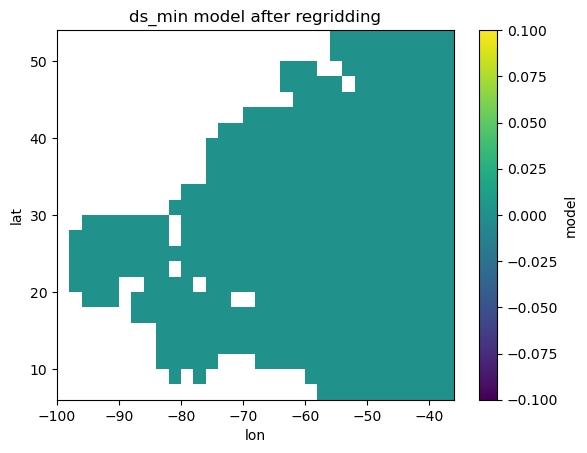

In [12]:
ds_regridmask=ds_min['model']
diff=ds_min['model']-ds_regridmask
plt.figure()
da_MLD_EN1_wave_ave=xr.DataArray(diff, dims=['lat', 'lon'], coords={'lon': ds_min['lon'], 'lat': ds_min['lat']})
da_MLD_EN1_wave_ave.plot(vmin=-0.1,vmax=0.1)
plt.title('ds_min model after regridding')

In [2]:
import xarray as xr
import os
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import cmocean
import copy 
import glob
import subprocess
import xesmf as xe

pp_root_uncou = "/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou/"
pp_root_uncou_LAfalse="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou_LALTFalse/"
pp_root_12_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave_all/"
pp_root_12_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave/"
pp_root_6_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_all/"
pp_root_6_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_wave/"

def read_and_extract_monthly_climatology(pp_root, data_list, variables):
    monthly_climatology = {var: [] for var in variables}

    for var_name in variables:
        # Initialize accumulators for each month (1 to 12)
        monthly_sum = {m: 0 for m in range(1, 13)}
        monthly_count = {m: 0 for m in range(1, 13)}

        for file_path in data_list:
            file_path = os.path.join(pp_root, file_path)
            if os.path.exists(file_path):
                try:
                    ds = xr.open_dataset(file_path)
                    if var_name in ds:
                        var = ds[var_name]

                        # Group by month
                        for m in range(1, 13):
                            monthly_data = var.sel(time=var['time'].dt.month == m)
                            if monthly_data.time.size > 0:
                                valid_data = monthly_data.where(~np.isnan(monthly_data), drop=False)
                                month_sum = valid_data.sum(dim='time', skipna=True)
                                month_count = valid_data.notnull().sum(dim='time')

                                monthly_sum[m] += month_sum
                                monthly_count[m] += month_count
                    ds.close()

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
            else:
                print(f"File not found: {file_path}")

        # Combine to get the climatological monthly average
        monthly_climatology[var_name] = [monthly_sum[m] / monthly_count[m] if monthly_count[m] is not None else None for m in range(1, 13)]

    return monthly_climatology
Mdata_list = [
    '20040101_results/20040101.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',

]


monthly_means=read_and_extract_monthly_climatology(pp_root_uncou, Mdata_list, ['MLD_EN1'])




/vftmp/Qian.Xiao/pid983172/ipykernel_985465/264243204.py:31: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
/vftmp/Qian.Xiao/pid983172/ipykernel_985465/264243204.py:31: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
/vftmp/Qian.Xiao/pid983172/ipykernel_985465/264243204.py:31: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
/vftmp/Qian.Xiao/pid983172/ipykernel_985465/264243204.py:31: FutureWarning: In a future version of xarray decode_timedelt

AttributeError: 'list' object has no attribute 'groupby'

In [3]:
monthly_means

{'MLD_EN1': [<xarray.DataArray 'MLD_EN1' (yh: 845, xh: 775)> Size: 5MB
  array([[         nan,          nan,          nan, ...,  50.84578986,
           50.9479852 ,  49.2772795 ],
         [         nan,          nan,          nan, ...,  52.28947368,
           51.88761822,  50.41660028],
         [         nan,          nan,          nan, ...,  53.35585424,
           52.77683941,  51.27492483],
         ...,
         [         nan,          nan,          nan, ..., 157.25958573,
          156.02724095, 153.69677734],
         [         nan,          nan,          nan, ..., 154.46241519,
          152.54224918, 147.74484735],
         [         nan,          nan,          nan, ..., 157.33215975,
          153.96399568, 148.31551963]])
  Coordinates:
    * xh       (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
    * yh       (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93,
  <xarray.DataArray 'MLD_EN1' (yh: 845, xh: 775)> Size: 5MB
  array([[        

/vftmp/Qian.Xiao/pid983172/ipykernel_985465/2004640888.py:4: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  model_grid_x =xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_month.nc")['xh'] ##long -100 to -35 xh
/vftmp/Qian.Xiao/pid983172/ipykernel_985465/2004640888.py:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  model_grid_y = xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_month.nc")['yh'] ## latitude 5 to 55


Before regridding (model): 263153
After regridding (ds_min): 279


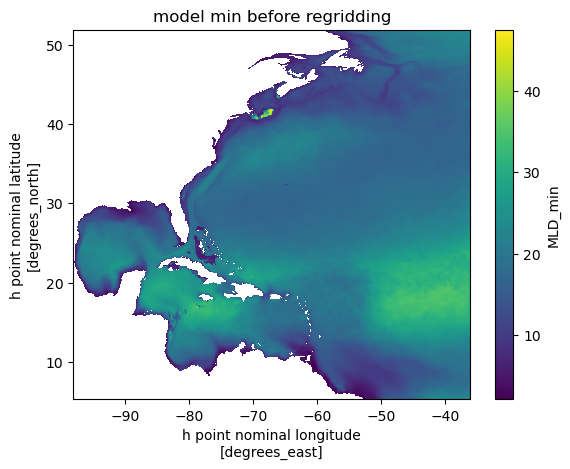

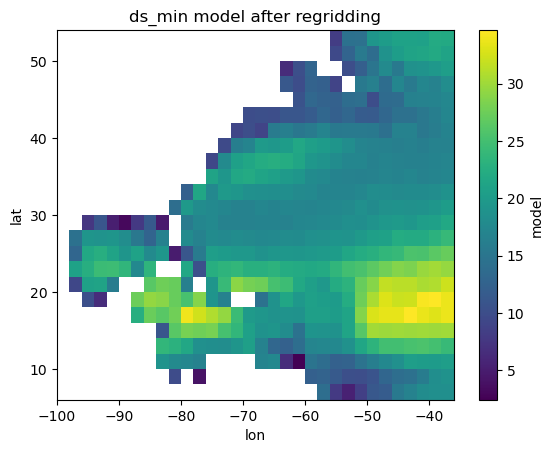

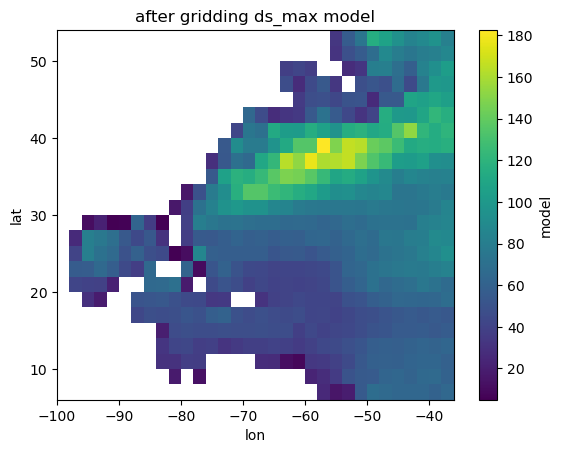

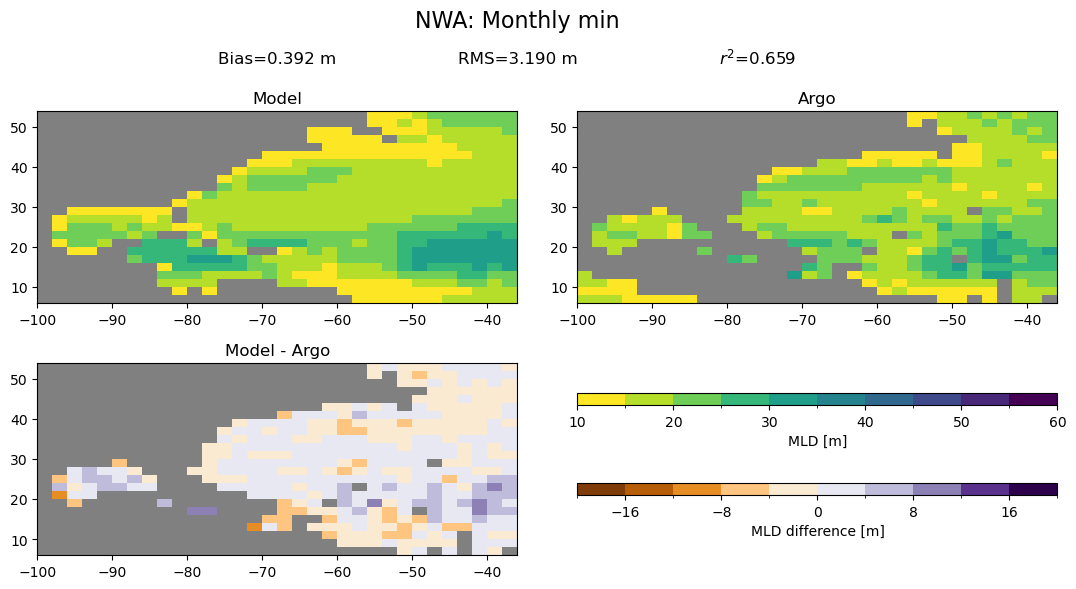

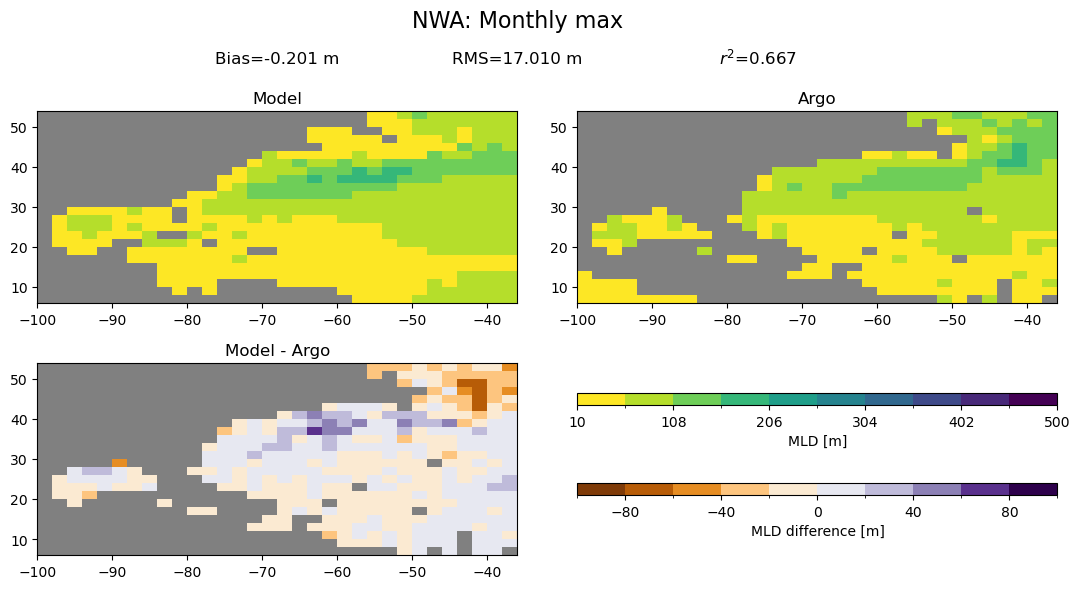

In [5]:

ds_modeldata = xr.concat(monthly_means['MLD_EN1'], dim='month')
ds_modeldata['month'] = np.arange(1, 13)  # Assign month coords
ds_uncou_grid=xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_static.nc")[['geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v','geolon','geolat']]
model_grid_x =xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_month.nc")['xh'] ##long -100 to -35 xh
model_grid_y = xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_month.nc")['yh'] ## latitude 5 to 55 

static = ds_uncou_grid
Dims = [-100,-35,5,55]
Central = 0.5*(Dims[0]+Dims[1])
CLim1_min=[10,60]
CLim2_min=[-20,20]
CLim1_max=[10,500]
CLim2_max=[-100,100]
expName='NWA'

Options = {
    'experiment name':expName,
    'Dims':Dims,
    'central':Central,
    'CLim1_min':CLim1_min,
    'CLim2_min':CLim2_min,
    'CLim1_max':CLim1_max,
    'CLim2_max':CLim2_max,
}
  
obs_en1 = '/net3/bgr/Datasets/Argo/MLDs_v2/Argo_MLD.mld_pe_anomaly_25.nc'
ds_en1= xr.open_dataset(obs_en1)
MLD_argo=ds_en1
t_argo=MLD_argo.variables['Month']
MLD_argo = MLD_argo.assign_coords(Lon=((MLD_argo.Lon + 180) % 360 - 180))
MLD_argo = MLD_argo.sortby("Lon")
argo_lat=MLD_argo.variables['Lat']
argo_lon=MLD_argo.variables['Lon']
MLD_argo=MLD_argo.variables['MLD_mean']
MLD_argo=xr.DataArray(MLD_argo, dims=["Month", "Lon", "Lat"],coords={'Month': t_argo.values,'Lon': argo_lon.values, 'Lat': argo_lat.values})



ds_obsdata = xr.Dataset()
ds_obsdata['lat']=MLD_argo['Lat'].values
ds_obsdata['lon']=MLD_argo['Lon'].values
ds_obsdata['Month']=MLD_argo['Month'].values
ds_obsdata['MLD_EN1']=(('Month','lon','lat'),MLD_argo.values)

def Set_Plot_ds(cmn_lat,cmn_lon):
    #Using the obs to build the plotting grid
    #Can xarray handle periodic slicing domains?  I'm not sure so adjusting.
    ds_plot = xr.Dataset()
    ds_plot['lat'] = cmn_lat
    ds_plot['lon'] = cmn_lon
    
    return ds_plot

obs_lat = np.copy(ds_obsdata['lat'])
obs_lon = np.copy(ds_obsdata['lon'])
obs_lon[obs_lon<Options['Dims'][0]]+=360
obs_lon[obs_lon>Options['Dims'][1]]-=360
xi = np.argsort(obs_lon)
obs_lon_sort = obs_lon[xi]
lonlims = np.where((obs_lon_sort>Options['Dims'][0])&
                   (obs_lon_sort<Options['Dims'][1]))[0]
latlims = np.where((obs_lat>Options['Dims'][2])&
                   (obs_lat<Options['Dims'][3]))[0]
cmn_lat = obs_lat[latlims]
cmn_lon = obs_lon_sort[lonlims]

ds_min = Set_Plot_ds(cmn_lat,cmn_lon)
ds_max = Set_Plot_ds(cmn_lat,cmn_lon)
# print('ds_min',ds_min)
# print('ds_max',ds_max)

model = xr.Dataset()
model["yh"]=ds_modeldata.yh.values
model["xh"]=ds_modeldata.xh.values
model["MLD_min"]=(('yh','xh'),ds_modeldata.min(dim='month').values)
model["MLD_max"]=(('yh','xh'),ds_modeldata.max(dim='month').values)
model = model.assign_coords(lon=(('yh','xh'),ds_uncou_grid['geolon'].values))
model = model.assign_coords(lat=(('yh','xh'),ds_uncou_grid['geolat'].values))
plt.figure()
da_MLD_EN1_wave_ave=xr.DataArray(model["MLD_min"], dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
da_MLD_EN1_wave_ave.plot()
plt.title('model min before regridding')

# plt.figure()
# da_MLD_EN1_wave_ave=xr.DataArray(model["MLD_max"], dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
# da_MLD_EN1_wave_ave.plot()
# plt.title('model max')

# model = model.assign_coords(lon=(('yh','xh'), np.mod(ds_uncou_grid['geolon'].values + 180, 360) - 180))


obs = xr.Dataset()
obs['lat']=ds_obsdata['lat'].values
obs['lon']=ds_obsdata['lon'].values

obs["MLD_min"]=(('lat','lon'),ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T)
obs["MLD_max"]=(('lat','lon'),ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T)


# plt.figure()
# da_MLD_EN1_wave_ave=xr.DataArray(obs["MLD_min"], dims=['lat', 'lon'], coords={'lon': obs['lon'], 'lat': obs['lat']})
# da_MLD_EN1_wave_ave.plot()
# plt.title('argo min')
# # plt.figure()
# # da_MLD_EN1_wave_ave=xr.DataArray(obs["MLD_max"], dims=['lat', 'lon'], coords={'lon': obs['lon'], 'lat': obs['lat']})
# # da_MLD_EN1_wave_ave.plot()

# regridder_mod = xe.Regridder(model, ds_min, "nearest_s2d",ignore_degenerate=True)  # Explicitly set extrapolation to NaN)
regridder_mod = xe.Regridder(model, ds_min, "bilinear",ignore_degenerate=True,extrap_method=None) 
ds_min['model'] = (('lat','lon'),regridder_mod(model.MLD_min.data))
#####________________________________________________________________________________
# from scipy.interpolate import griddata

# # Flatten model coordinates and data
# lon_model = model['lon'].values.flatten()
# lat_model = model['lat'].values.flatten()
# data_model = model['MLD_min'].values.flatten()

# # Build mask: only use points where data is not NaN
# mask_valid = ~np.isnan(data_model)
# lon_model_valid = lon_model[mask_valid]
# lat_model_valid = lat_model[mask_valid]
# data_model_valid = data_model[mask_valid]

# # Target coordinates from ds_min (obs grid)
# lon_target, lat_target = np.meshgrid(ds_min['lon'].values, ds_min['lat'].values)

# # Interpolate
# interp_min = griddata(
#     points=(lon_model_valid, lat_model_valid),
#     values=data_model_valid,
#     xi=(lon_target, lat_target),
#     method='linear'  # or 'nearest' if you want no interpolation
# )

# # Assign into ds_min
# ds_min['model'] = (('lat', 'lon'), interp_min)
###________________________________________________________________________________
# For model (source)
# lon2d_model, lat2d_model = np.meshgrid(model_grid_x.values, model_grid_y.values)

# model['lon'] = (('yh', 'xh'), lon2d_model)
# model['lat'] = (('yh', 'xh'), lat2d_model)
# def create_corner_bounds_2d(lon, lat):
#     """
#     Create (ny, nx, 4) corner bounds from 1D lon and lat.
#     """
#     lon = np.asarray(lon)
#     lat = np.asarray(lat)

#     dlon = np.diff(lon) / 2
#     dlat = np.diff(lat) / 2

#     lon_b = np.zeros(len(lon) + 1)
#     lat_b = np.zeros(len(lat) + 1)

#     lon_b[1:-1] = lon[:-1] + dlon
#     lon_b[0] = lon[0] - dlon[0]
#     lon_b[-1] = lon[-1] + dlon[-1]

#     lat_b[1:-1] = lat[:-1] + dlat
#     lat_b[0] = lat[0] - dlat[0]
#     lat_b[-1] = lat[-1] + dlat[-1]

#     # Create 2D bounds
#     ny, nx = len(lat), len(lon)
#     lon_bounds = np.zeros((ny, nx, 4))
#     lat_bounds = np.zeros((ny, nx, 4))

#     for j in range(ny):
#         for i in range(nx):
#             # CCW: SW, SE, NE, NW
#             lon_bounds[j, i, 0] = lon_b[i]     # SW
#             lon_bounds[j, i, 1] = lon_b[i+1]   # SE
#             lon_bounds[j, i, 2] = lon_b[i+1]   # NE
#             lon_bounds[j, i, 3] = lon_b[i]     # NW

#             lat_bounds[j, i, 0] = lat_b[j]     # SW
#             lat_bounds[j, i, 1] = lat_b[j]     # SE
#             lat_bounds[j, i, 2] = lat_b[j+1]   # NE
#             lat_bounds[j, i, 3] = lat_b[j+1]   # NW

#     return lon_bounds, lat_bounds
# lon_b_model, lat_b_model = create_corner_bounds_2d(model_grid_x.values, model_grid_y.values)
# model['lon_b'] = (('yh', 'xh', 'nv4'), lon_b_model)
# model['lat_b'] = (('yh', 'xh', 'nv4'), lat_b_model)



# lon_tgt, lat_tgt = np.meshgrid(ds_min['lon'].values, ds_min['lat'].values)
# ds_min['lon'] = (('lat', 'lon'), lon_tgt)
# ds_min['lat'] = (('lat', 'lon'), lat_tgt)

# lon_b_tgt, lat_b_tgt = create_corner_bounds_2d(ds_min['lon'].values[0, :], ds_min['lat'].values[:, 0])
# ds_min['lon_b'] = (('lat', 'lon', 'nv4'), lon_b_tgt)
# ds_min['lat_b'] = (('lat', 'lon', 'nv4'), lat_b_tgt)


# regridder_cons = xe.Regridder(
#     model,
#     ds_min,
#     method="conservative",
#     extrap_method=None,
#     ignore_degenerate=True
# )

# ds_min['model'] = (('lat', 'lon'), regridder_cons(model['MLD_min']))
#####________________________________________________________________________________
# from pyresample import geometry, kd_tree

# # Source: high-res model
# src_geo_def = geometry.SwathDefinition(
#     lons=model['lon'].values,
#     lats=model['lat'].values
# )

# # Target: coarse obs grid
# lon_target, lat_target = np.meshgrid(ds_min['lon'].values, ds_min['lat'].values)
# tgt_geo_def = geometry.SwathDefinition(
#     lons=lon_target,
#     lats=lat_target
# )
# data_model = model['MLD_min'].values

# # Mask invalid points
# mask_valid = ~np.isnan(data_model)

# # Interpolation with mask-aware nearest
# interpolated = kd_tree.resample_nearest(
#     src_geo_def,
#     data_model,
#     tgt_geo_def,
#     radius_of_influence=50000,  # in meters (e.g., 50 km)
#     fill_value=np.nan
# )
# ds_min['model'] = (('lat', 'lon'), interpolated)

# data_model_max = model['MLD_max'].values

# # Mask invalid points
# mask_valid_max = ~np.isnan(data_model_max)

# # Interpolation with mask-aware nearest
# interpolated_max = kd_tree.resample_nearest(
#     src_geo_def,
#     data_model_max,
#     tgt_geo_def,
#     radius_of_influence=50000,  # in meters (e.g., 50 km)
#     fill_value=np.nan
# )
# ds_max['model'] = (('lat', 'lon'), interpolated_max)
#####________________________________________________________________________________
# # Create a mask where the original model has NaN
# mask = np.isnan(model["MLD_min"].values).astype(float)  # Convert to float for regridding

# # Regrid the mask using nearest-neighbor (preserves exact NaN locations)
# regridder_mask = xe.Regridder(
#     model,
#     ds_min,
#     "nearest_s2d",
#     ignore_degenerate=True
# )
# mask_regridded = regridder_mask(mask)
# plt.figure()
# da_MLD_EN1_mask_ave=xr.DataArray(mask_regridded, dims=['lat', 'lon'], coords={'lon': ds_min['lon'], 'lat': ds_min['lat']})
# da_MLD_EN1_mask_ave.plot()
# plt.title('mask_regridded after regridding')

# # Apply the mask to the regridded data
# ds_min['model'] = ds_min['model'].where(mask_regridded == 0)  # 0 = original was not NaN
#####________________________________________________________________________________


ds_min['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))

ds_max['model'] = (('lat','lon'),regridder_mod(model.MLD_max.data))
# ds_max['model'] = ds_max['model'].where(mask_regridded == 0)  # 0 = original was not NaN

ds_max['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))

ds_min['model'] = ds_min['model'].where(~np.isnan(regridder_mod(model.MLD_min.data)))
ds_max['model'] = ds_max['model'].where(~np.isnan(regridder_mod(model.MLD_max.data)))
ds_min['model'] = ds_min['model'].where(ds_min['model'] > 0)
ds_max['model'] = ds_max['model'].where(ds_max['model'] > 0)

plt.figure()
da_MLD_EN1_wave_ave=xr.DataArray(ds_min['model'], dims=['lat', 'lon'], coords={'lon': ds_min['lon'], 'lat': ds_min['lat']})
da_MLD_EN1_wave_ave.plot()
plt.title('ds_min model after regridding')
print("Before regridding (model):", np.isnan(model["MLD_min"].values).sum())
print("After regridding (ds_min):", np.isnan(ds_min['model'].values).sum())
plt.figure()
da_MLD_EN1_wave_ave=xr.DataArray(ds_max['model'], dims=['lat', 'lon'], coords={'lon': ds_max['lon'], 'lat': ds_max['lat']})
da_MLD_EN1_wave_ave.plot()
plt.title('after gridding ds_max model')

def ComputeStats(ds):
    plon,plat = np.meshgrid(ds.lon.values,ds.lat.values)
    Mask = ((np.isfinite(ds.model.values))&(np.isfinite(ds.obs.values))&
           (plon>Options['Dims'][0])&
           (plon<Options['Dims'][1])&
           (plat>Options['Dims'][2])&
           (plat<Options['Dims'][3])
          )
    diff = (ds.model - ds.obs).values
    ds['bias']=np.nansum((diff[Mask]*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel())
    ds['RMS'] =np.sqrt(np.nansum((diff[Mask]**2*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel()))
    ds['r2']  =np.corrcoef(ds.model.values[Mask].ravel(),ds.obs.values[Mask].ravel())[1,0]**2
    return ds
ds_min = ComputeStats(ds_min)
ds_max = ComputeStats(ds_max)
diff=xr.Dataset()    
for ds_plot,method in [[ds_min,'min'],
                       [ds_max,'max']
                      ]:
    cmap = copy.copy(plt.cm.viridis_r)
    cmap2 = copy.copy(plt.cm.PuOr)
    cmap.set_bad('gray')
    cmap2.set_bad('gray')
    levels = np.linspace(Options['CLim1_'+method][0],Options['CLim1_'+method][1],11);
    levels2 = np.linspace(Options['CLim2_'+method][0],Options['CLim2_'+method][1],11);
    
    F = plt.figure(figsize=(12, 6))
    lon = ds_plot['lon'].values
    lat = ds_plot['lat'].values
    mod = ds_plot['model'].values
    obs = ds_plot['obs'].values
    dif = mod-obs
    diff[method] = xr.DataArray(dif, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon})
    lon,lat = np.meshgrid(lon,lat)
                       
    #ax=F.add_axes([0.1,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray',)
    ax=F.add_axes([0.1,0.52,0.4,0.32])
    cb0 = ax.pcolormesh(lon,
                        lat,
                        mod,
                       shading="auto", 
                       #transform=ccrs.PlateCarree(),
                       cmap=cmap,
                       norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
    ax.set_title('Model')
    
    # ax=F.add_axes([0.5,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
    ax=F.add_axes([0.55,0.52,0.4,0.32])
    cb1 = ax.pcolormesh(lon,lat,obs,
                       shading="auto", 
                       #transform=ccrs.PlateCarree(),
                       cmap=cmap,
                       norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
    ax.set_title('Argo')
    
    # ax=F.add_axes([0.1,0.1,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
    ax=F.add_axes([0.1,0.1,0.4,0.32])
    cb2 = ax.pcolormesh(lon,lat,dif,
                       shading="auto", 
                       #transform=ccrs.PlateCarree(),
                       cmap=cmap2,
                       norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False),)
    ax.set(title='Model - Argo')
    
    cax1 = F.add_axes([0.55, 0.35, 0.4, 0.02])
    cbar1 = plt.colorbar(cb1,cax=cax1,orientation='horizontal')
    cbar1.set_label('MLD [m]')
    cax2 = F.add_axes([0.55, 0.2, 0.4, 0.02])
    cbar2 = plt.colorbar(cb2,cax=cax2,orientation='horizontal')
    cbar2.set_label('MLD difference [m]')
    
    
    ax = F.add_axes([0.1,0.9,0.8,0.1])
    ax.axis('off')
    ax.set(xlim=(0,1),ylim=(0,1))
    FS=12
    ax.text(0.25,0.2,'Bias={:4.3f} m'.format(ds_plot['bias'].values),fontsize=FS,horizontalalignment='center')
    ax.text(0.5,0.2,'RMS={:4.3f} m'.format(ds_plot['RMS'].values),fontsize=FS,horizontalalignment='center')
    ax.text(0.75,0.2,'$r^2$={:4.3f}'.format(ds_plot['r2'].values),fontsize=FS,horizontalalignment='center')
    FS=16
    ax.text(0.5,0.8,Options['experiment name']+': Monthly '+method,
            fontsize=FS,horizontalalignment='center')



    

In [14]:
import xarray as xr
import os
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import cmocean
import copy 
import glob
import subprocess

import xesmf as xe
obs_en1 = '/net3/bgr/Datasets/Argo/MLDs_v2/Argo_MLD.mld_pe_anomaly_25.nc'
ds_en1= xr.open_dataset(obs_en1)
MLD_argo=ds_en1
t_argo=MLD_argo.variables['Month']
MLD_argo = MLD_argo.assign_coords(Lon=((MLD_argo.Lon + 180) % 360 - 180))
MLD_argo = MLD_argo.sortby("Lon")
argo_lat=MLD_argo.variables['Lat']
argo_lon=MLD_argo.variables['Lon']
MLD_argo=MLD_argo.variables['MLD_mean']
MLD_argo=xr.DataArray(MLD_argo, dims=["Month", "Lon", "Lat"],coords={'Month': t_argo.values,'Lon': argo_lon.values, 'Lat': argo_lat.values})


ds_obsdata = xr.Dataset()
ds_obsdata['lat']=MLD_argo['Lat'].values
ds_obsdata['lon']=MLD_argo['Lon'].values
ds_obsdata['Month']=MLD_argo['Month'].values
ds_obsdata['MLD_EN1']=(('Month','lon','lat'),MLD_argo.values)

def read_and_extract_monthly_climatology_wave(pp_root, data_list, variables):
    monthly_climatology = {var: [] for var in variables}
    
    for var_name in variables:
        monthly_sum = {m: None for m in range(1, 13)}
        monthly_count = {m: None for m in range(1, 13)}

        for file_path in data_list:
            file_path = os.path.join(pp_root, file_path)
            if os.path.exists(file_path):
                try:
                    ds = xr.open_dataset(file_path)
                    if var_name in ds:
                        var = ds[var_name]

                        for m in range(1, 13):
                            monthly_data = var.sel(time=var['time'].dt.month == m)
                            if monthly_data.time.size > 0:
                                valid_data = monthly_data.where(~np.isnan(monthly_data), drop=False)
                                month_sum = valid_data.sum(dim='time', skipna=True)
                                month_count = valid_data.notnull().sum(dim='time')

                                if monthly_sum[m] is None:
                                    monthly_sum[m] = month_sum
                                    monthly_count[m] = month_count
                                else:
                                    monthly_sum[m] += month_sum
                                    monthly_count[m] += month_count
                    ds.close()
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
            else:
                print(f"File not found: {file_path}")

        # Finalize the monthly averages
        result = []
        for m in range(1, 13):
            if (monthly_sum[m] is not None) and (monthly_count[m] is not None):
                result.append(monthly_sum[m] / monthly_count[m])
            else:
                result.append(None)  # Or use a filled NaN array if desired

        monthly_climatology[var_name] = result

    return monthly_climatology
pp_root_uncou = "/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou/"
pp_root_uncou_LAfalse="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou_LALTFalse/"
pp_root_12_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave_all/"
pp_root_12_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave/"
pp_root_6_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_all/"
pp_root_6_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_wave/"
WMdata_list = [
    '20040101_results/20040101.ocean_month.nc',
    '20040701_results/20040701.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20050701_results/20050701.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20060701_results/20060701.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20070701_results/20070701.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20080701_results/20080701.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20090701_results/20090701.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20100701_results/20100701.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20110701_results/20110701.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20120701_results/20120701.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20130701_results/20130701.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20140701_results/20140701.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20150701_results/20150701.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20160701_results/20160701.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20170701_results/20170701.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20180701_results/20180701.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20190701_results/20190701.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20200701_results/20200701.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20210701_results/20210701.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',
    '20220701_results/20220701.ocean_month.nc',
]
Mdata_list = [
    '20040101_results/20040101.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',

]
ds_6_all_1=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_daily.nc")
model_grid_x = ds_6_all_1.variables['xh'] ##long -100 to -35 xh
model_grid_y = ds_6_all_1.variables['yh'] ## latitude 5 to 55 
ds_uncou_grid=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_static.nc")[['geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v','geolon','geolat']]
ds_wave=read_and_extract_monthly_climatology_wave(pp_root_uncou, Mdata_list, ['MLD_EN1'])
ds_wave

    

/vftmp/Qian.Xiao/pid1863025/ipykernel_1870175/4127613791.py:143: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_6_all_1=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_daily.nc")
/vftmp/Qian.Xiao/pid1863025/ipykernel_1870175/4127613791.py:41: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
/vftmp/Qian.Xiao/pid1863025/ipykernel_1870175/4127613791.py:41: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
/vftmp/Qian.Xiao/pid1863025/ipykernel_1870175/4127613791.

{'MLD_EN1': [<xarray.DataArray 'MLD_EN1' (yh: 845, xh: 775)> Size: 5MB
  array([[         nan,          nan,          nan, ...,  50.84578986,
           50.9479852 ,  49.2772795 ],
         [         nan,          nan,          nan, ...,  52.28947368,
           51.88761822,  50.41660028],
         [         nan,          nan,          nan, ...,  53.35585424,
           52.77683941,  51.27492483],
         ...,
         [         nan,          nan,          nan, ..., 157.25958573,
          156.02724095, 153.69677734],
         [         nan,          nan,          nan, ..., 154.46241519,
          152.54224918, 147.74484735],
         [         nan,          nan,          nan, ..., 157.33215975,
          153.96399568, 148.31551963]])
  Coordinates:
    * xh       (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
    * yh       (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93,
  <xarray.DataArray 'MLD_EN1' (yh: 845, xh: 775)> Size: 5MB
  array([[        

In [ ]:
ds_wave

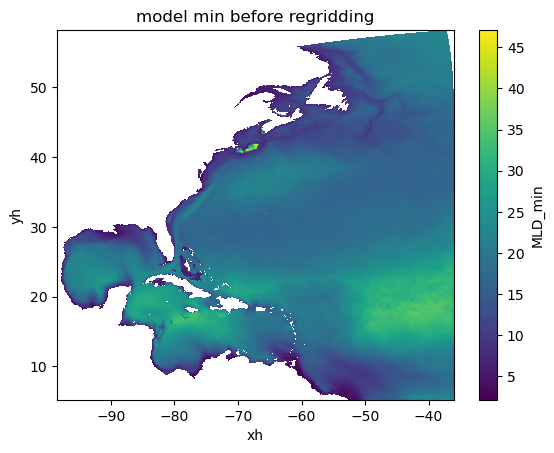

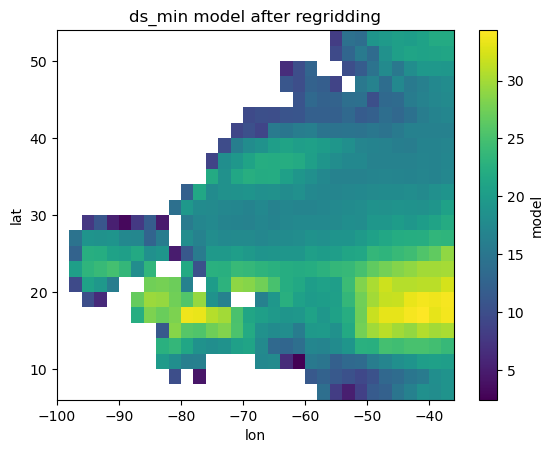

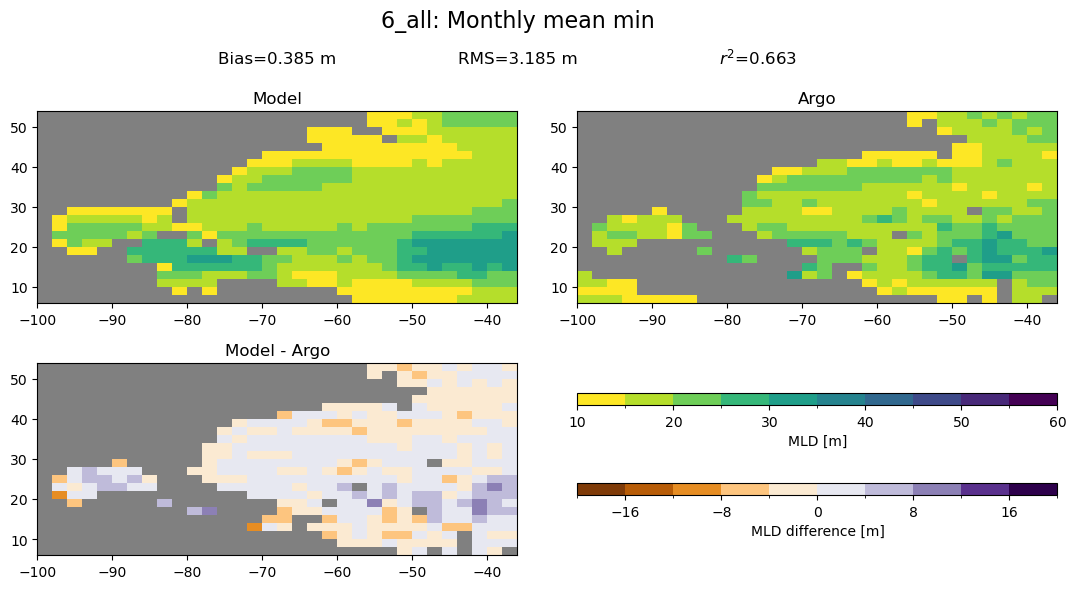

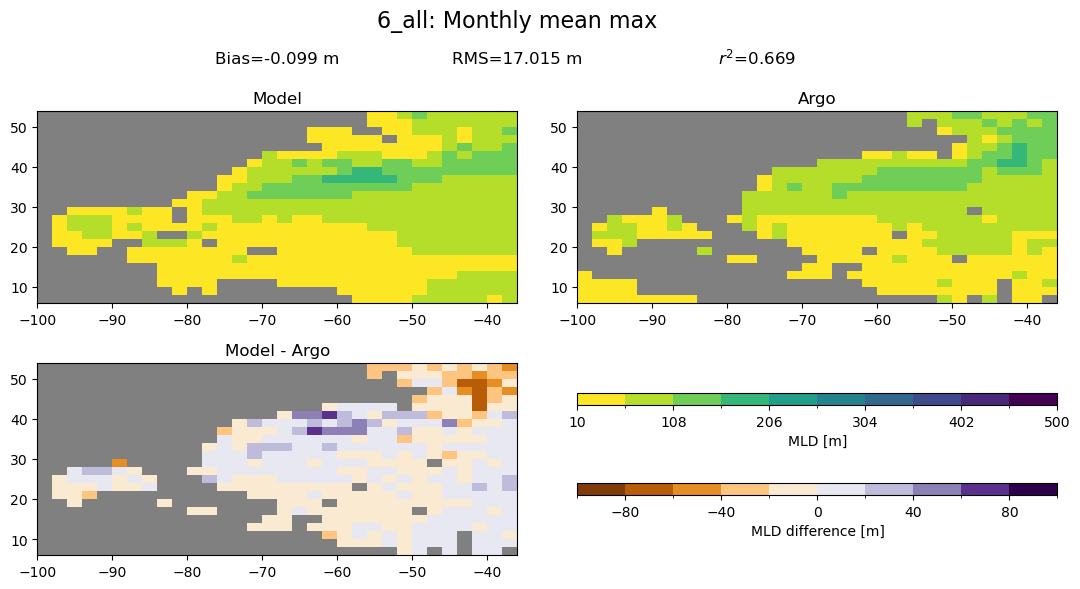

In [13]:
# ds_modeldata = ds_modeldata.groupby('time.month').mean('time')
ds_modeldata = xr.concat(ds_wave['MLD_EN1'], dim='month')
ds_modeldata['month'] = np.arange(1, 13)  # Assign month coords
static = ds_uncou_grid
expName="6_all"
Dims = [-100,-35,5,55]
Central = 0.5*(Dims[0]+Dims[1])
CLim1_min=[10,60]
CLim2_min=[-20,20]
CLim1_max=[10,500]
CLim2_max=[-100,100]

Options = {
    'experiment name':expName,
    'Dims':Dims,
    'central':Central,
    'CLim1_min':CLim1_min,
    'CLim2_min':CLim2_min,
    'CLim1_max':CLim1_max,
    'CLim2_max':CLim2_max,
}
def Set_Plot_ds(cmn_lat,cmn_lon):
    #Using the obs to build the plotting grid
    #Can xarray handle periodic slicing domains?  I'm not sure so adjusting.
    ds_plot = xr.Dataset()
    ds_plot['lat'] = cmn_lat
    ds_plot['lon'] = cmn_lon
    
    return ds_plot

obs_lat = np.copy(ds_obsdata['lat'])
obs_lon = np.copy(ds_obsdata['lon'])
obs_lon[obs_lon<Options['Dims'][0]]+=360
obs_lon[obs_lon>Options['Dims'][1]]-=360
xi = np.argsort(obs_lon)
obs_lon_sort = obs_lon[xi]
lonlims = np.where((obs_lon_sort>Options['Dims'][0])&
                   (obs_lon_sort<Options['Dims'][1]))[0]
latlims = np.where((obs_lat>Options['Dims'][2])&
                   (obs_lat<Options['Dims'][3]))[0]
cmn_lat = obs_lat[latlims]
cmn_lon = obs_lon_sort[lonlims]

ds_min = Set_Plot_ds(cmn_lat,cmn_lon)
ds_max = Set_Plot_ds(cmn_lat,cmn_lon)


model = xr.Dataset()
model["yh"]=ds_modeldata.yh.values
model["xh"]=ds_modeldata.xh.values

model["MLD_min"]=(('yh','xh'),ds_modeldata.min(dim='month').values)
model["MLD_max"]=(('yh','xh'),ds_modeldata.max(dim='month').values)
model = model.assign_coords(lon=(('yh','xh'),ds_uncou_grid['geolon'].values))
model = model.assign_coords(lat=(('yh','xh'),ds_uncou_grid['geolat'].values))

plt.figure()
da_MLD_EN1_wave_ave=xr.DataArray(model["MLD_min"], dims=['yh', 'xh'], coords={'xh': model['lon'], 'yh': model['lat']})
da_MLD_EN1_wave_ave.plot()
plt.title('model min before regridding')


obs = xr.Dataset()
obs['lat']=ds_obsdata['lat'].values
obs['lon']=ds_obsdata['lon'].values

obs["MLD_min"]=(('lat','lon'),ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T)
obs["MLD_max"]=(('lat','lon'),ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T)

regridder_mod = xe.Regridder(model, ds_min, "bilinear",ignore_degenerate=True,extrap_method=None)

ds_min['model'] = (('lat','lon'),regridder_mod(model.MLD_min.data))

ds_min['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))

ds_max['model'] = (('lat','lon'),regridder_mod(model.MLD_max.data))

ds_max['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))
 

ds_min['model'] = ds_min['model'].where(~np.isnan(regridder_mod(model.MLD_min.data)))
ds_max['model'] = ds_max['model'].where(~np.isnan(regridder_mod(model.MLD_max.data)))
ds_min['model'] = ds_min['model'].where(ds_min['model'] > 0)
ds_max['model'] = ds_max['model'].where(ds_max['model'] > 0)
plt.figure()
da_MLD_EN1_wave_ave=xr.DataArray(ds_min['model'], dims=['lat', 'lon'], coords={'lon': ds_min['lon'], 'lat': ds_min['lat']})
da_MLD_EN1_wave_ave.plot()
plt.title('ds_min model after regridding')
def ComputeStats(ds):
    plon,plat = np.meshgrid(ds.lon.values,ds.lat.values)
    Mask = ((np.isfinite(ds.model.values))&(np.isfinite(ds.obs.values))&
           (plon>Options['Dims'][0])&
           (plon<Options['Dims'][1])&
           (plat>Options['Dims'][2])&
           (plat<Options['Dims'][3])
          )
    diff = (ds.model - ds.obs).values
    ds['bias']=np.nansum((diff[Mask]*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel())
    ds['RMS'] =np.sqrt(np.nansum((diff[Mask]**2*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel()))
    ds['r2']  =np.corrcoef(ds.model.values[Mask].ravel(),ds.obs.values[Mask].ravel())[1,0]**2
    return ds
ds_min = ComputeStats(ds_min)
ds_max = ComputeStats(ds_max)
diff=xr.Dataset()    
for ds_plot,method in [[ds_min,'min'],
                       [ds_max,'max']
                      ]:
    cmap = copy.copy(plt.cm.viridis_r)
    cmap2 = copy.copy(plt.cm.PuOr)
    cmap.set_bad('gray')
    cmap2.set_bad('gray')
    levels = np.linspace(Options['CLim1_'+method][0],Options['CLim1_'+method][1],11);
    levels2 = np.linspace(Options['CLim2_'+method][0],Options['CLim2_'+method][1],11);
    
    F = plt.figure(figsize=(12, 6))
    lon = ds_plot['lon'].values
    lat = ds_plot['lat'].values
    mod = ds_plot['model'].values
    obs = ds_plot['obs'].values
    dif = mod-obs
    diff[method] = xr.DataArray(dif, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon})
    lon,lat = np.meshgrid(lon,lat)
                       
    #ax=F.add_axes([0.1,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray',)
    ax=F.add_axes([0.1,0.52,0.4,0.32])
    cb0 = ax.pcolormesh(lon,
                        lat,
                        mod,
                       shading="auto", 
                       #transform=ccrs.PlateCarree(),
                       cmap=cmap,
                       norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
    ax.set_title('Model')
    
    # ax=F.add_axes([0.5,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
    ax=F.add_axes([0.55,0.52,0.4,0.32])
    cb1 = ax.pcolormesh(lon,lat,obs,
                       shading="auto", 
                       #transform=ccrs.PlateCarree(),
                       cmap=cmap,
                       norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
    ax.set_title('Argo')
    
    # ax=F.add_axes([0.1,0.1,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
    ax=F.add_axes([0.1,0.1,0.4,0.32])
    cb2 = ax.pcolormesh(lon,lat,dif,
                       shading="auto", 
                       #transform=ccrs.PlateCarree(),
                       cmap=cmap2,
                       norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False),)
    ax.set(title='Model - Argo')
    
    cax1 = F.add_axes([0.55, 0.35, 0.4, 0.02])
    cbar1 = plt.colorbar(cb1,cax=cax1,orientation='horizontal')
    cbar1.set_label('MLD [m]')
    cax2 = F.add_axes([0.55, 0.2, 0.4, 0.02])
    cbar2 = plt.colorbar(cb2,cax=cax2,orientation='horizontal')
    cbar2.set_label('MLD difference [m]')
    
    
    ax = F.add_axes([0.1,0.9,0.8,0.1])
    ax.axis('off')
    ax.set(xlim=(0,1),ylim=(0,1))
    FS=12
    ax.text(0.25,0.2,'Bias={:4.3f} m'.format(ds_plot['bias'].values),fontsize=FS,horizontalalignment='center')
    ax.text(0.5,0.2,'RMS={:4.3f} m'.format(ds_plot['RMS'].values),fontsize=FS,horizontalalignment='center')
    ax.text(0.75,0.2,'$r^2$={:4.3f}'.format(ds_plot['r2'].values),fontsize=FS,horizontalalignment='center')
    FS=16
    ax.text(0.5,0.8,Options['experiment name']+': Monthly mean '+method,
            fontsize=FS,horizontalalignment='center')


/vftmp/Qian.Xiao/pid2297540/ipykernel_2301554/2721482644.py:574: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_data_1=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_month.nc")
/vftmp/Qian.Xiao/pid2297540/ipykernel_2301554/2721482644.py:540: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
/vftmp/Qian.Xiao/pid2297540/ipykernel_2301554/2721482644.py:540: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
/vftmp/Qian.Xiao/pid2297540/ipykernel_2301554/2721482644

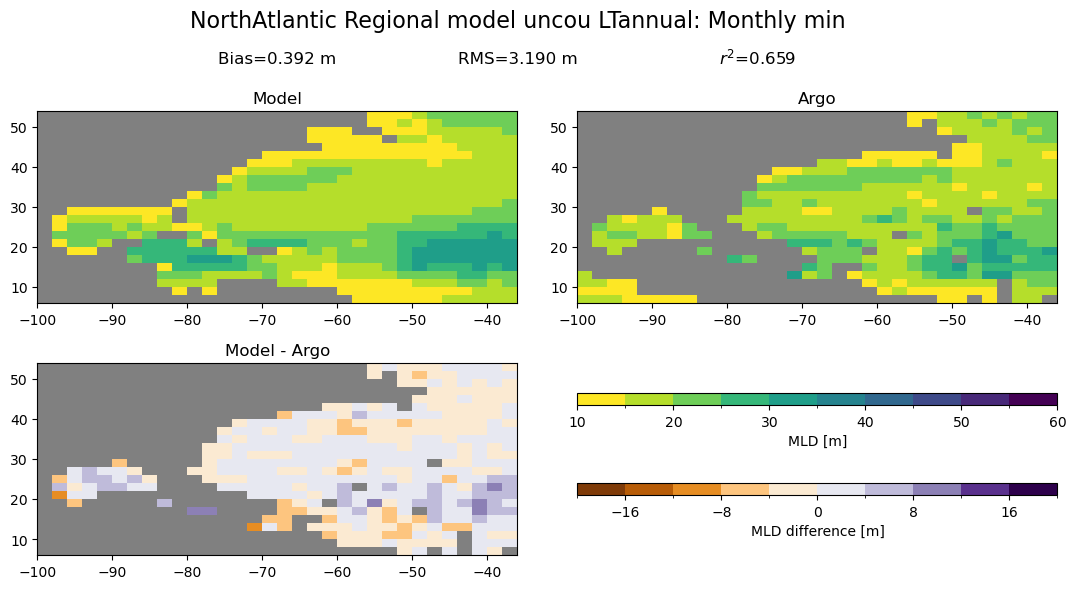

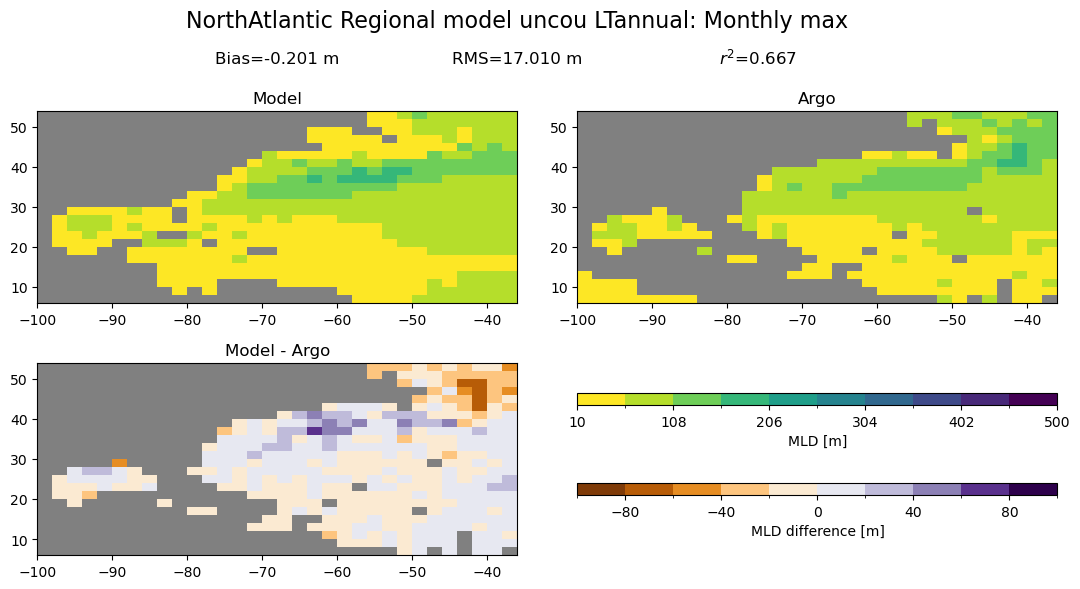

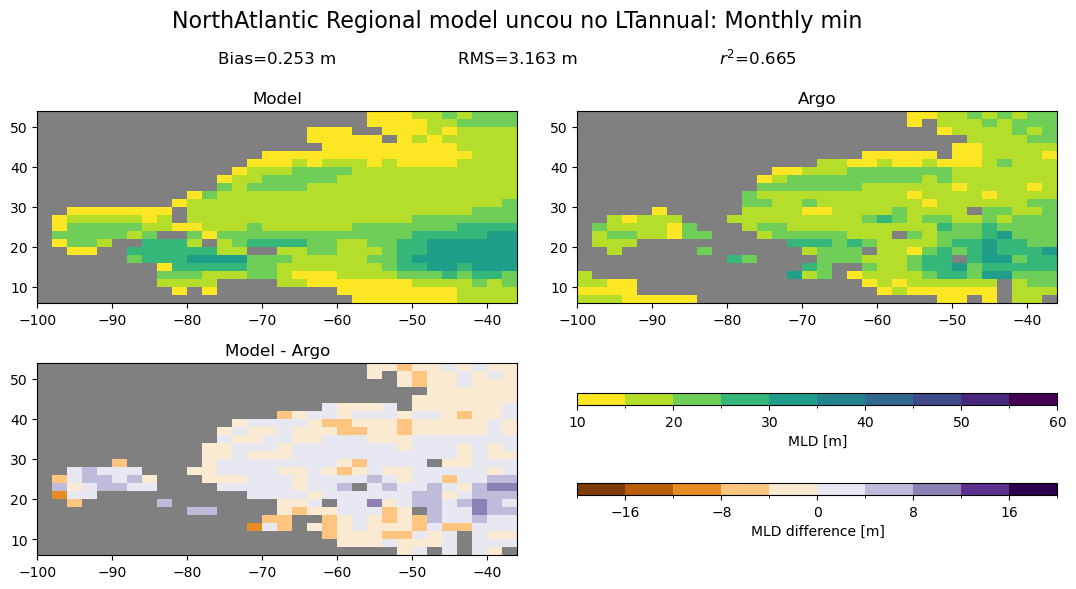

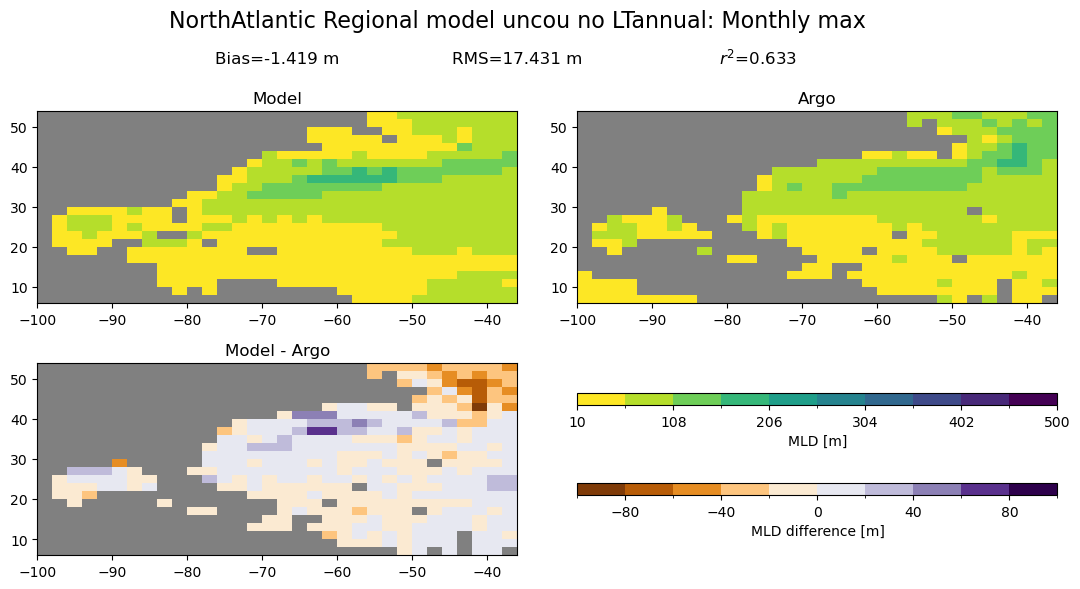

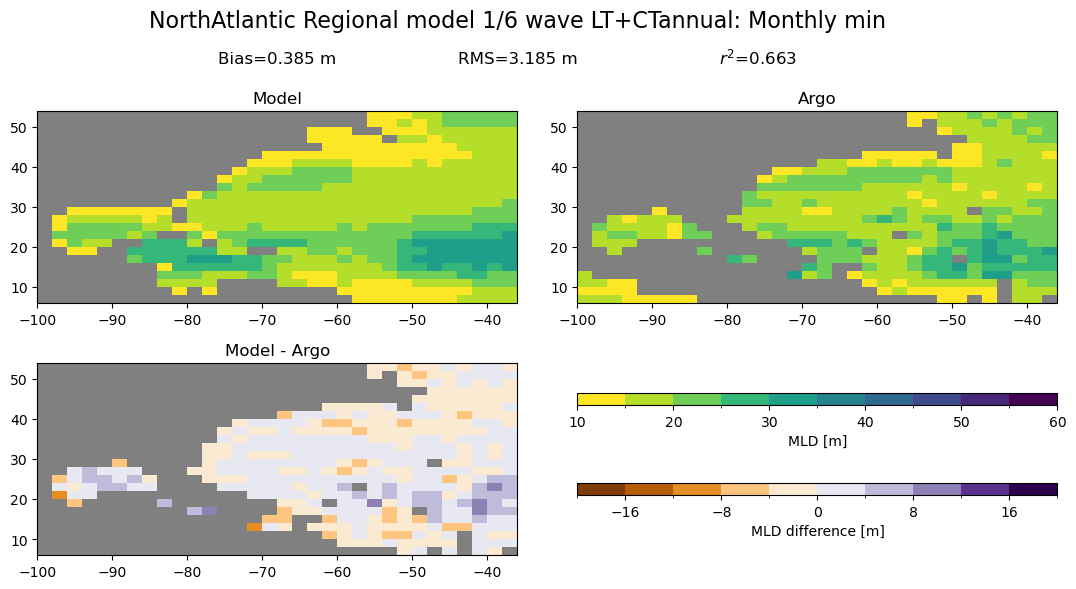

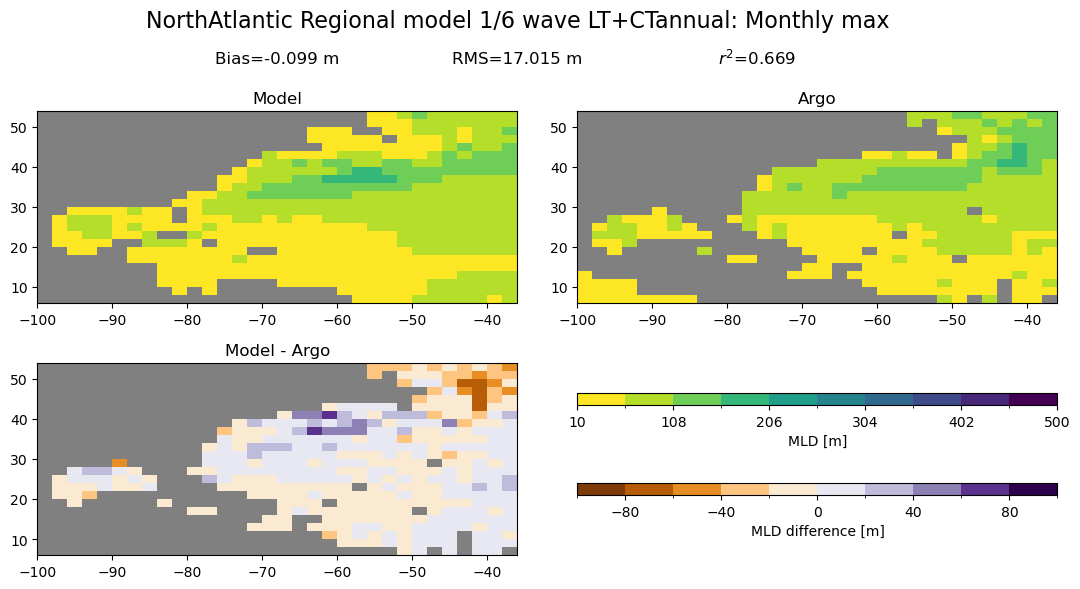

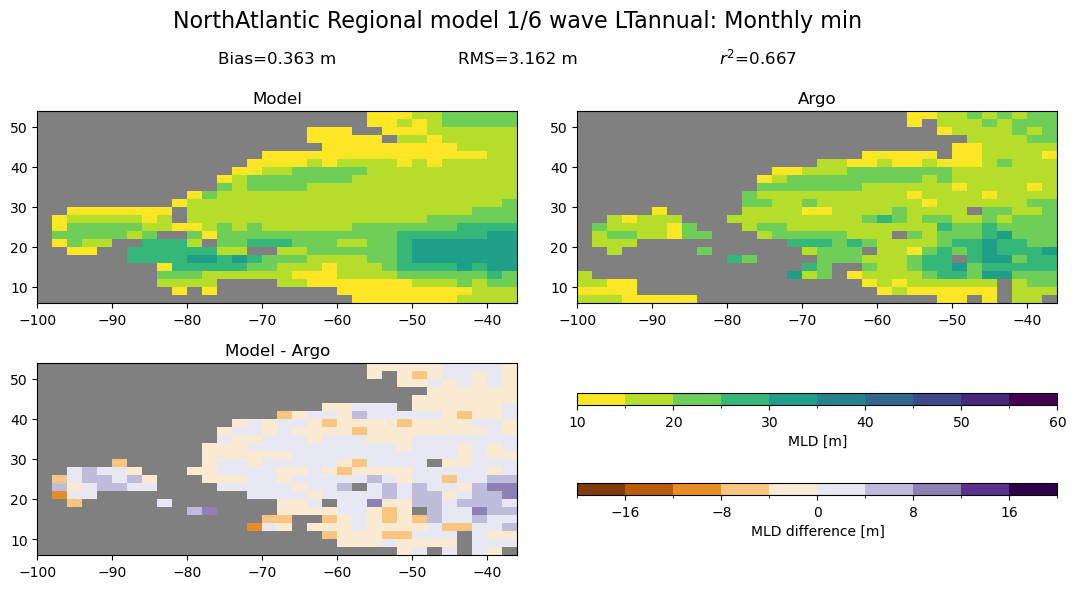

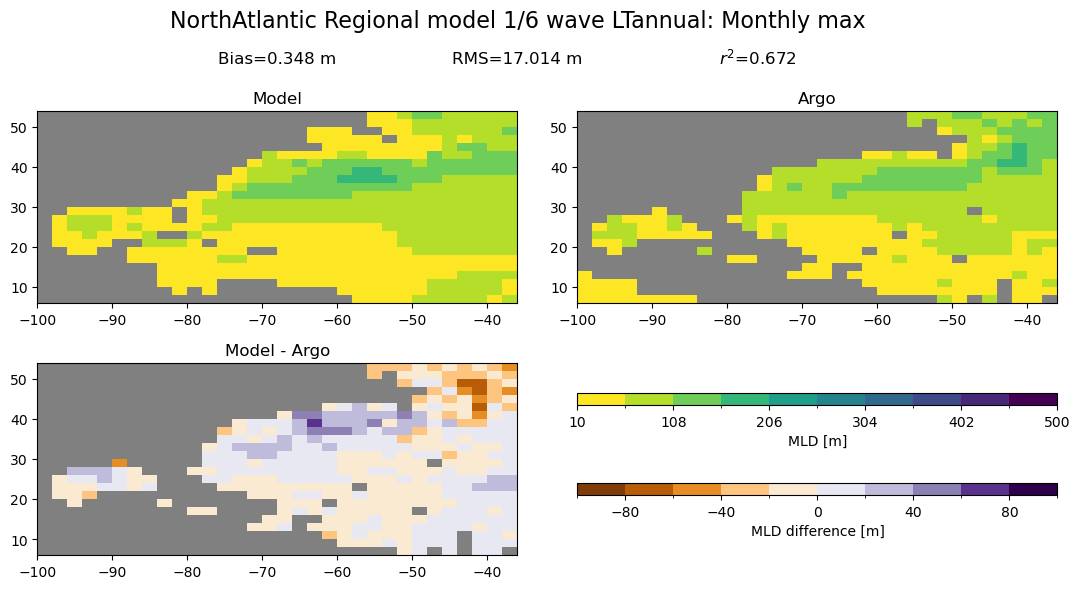

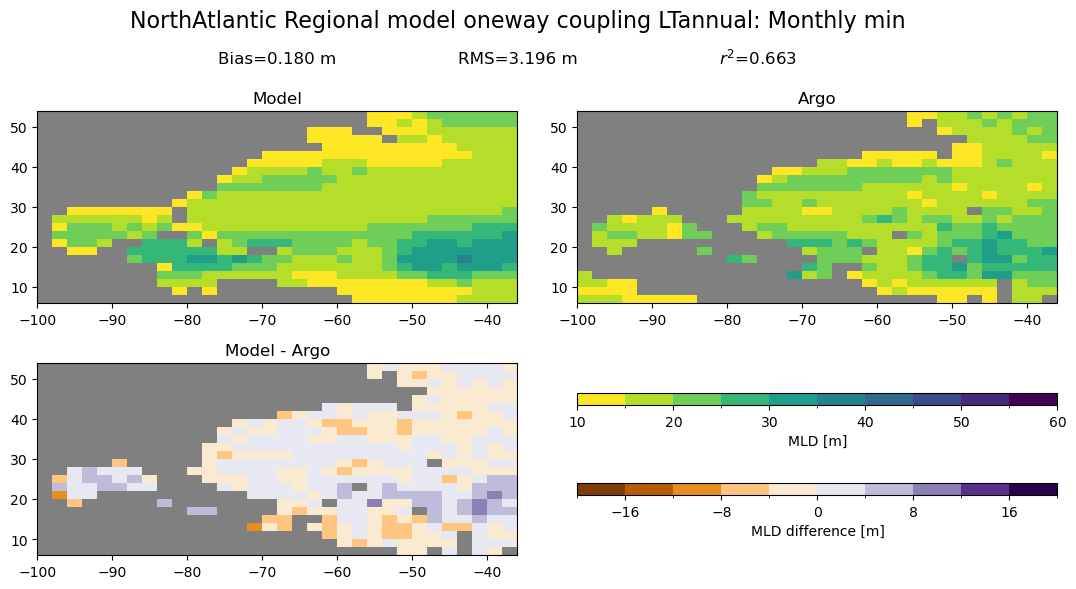

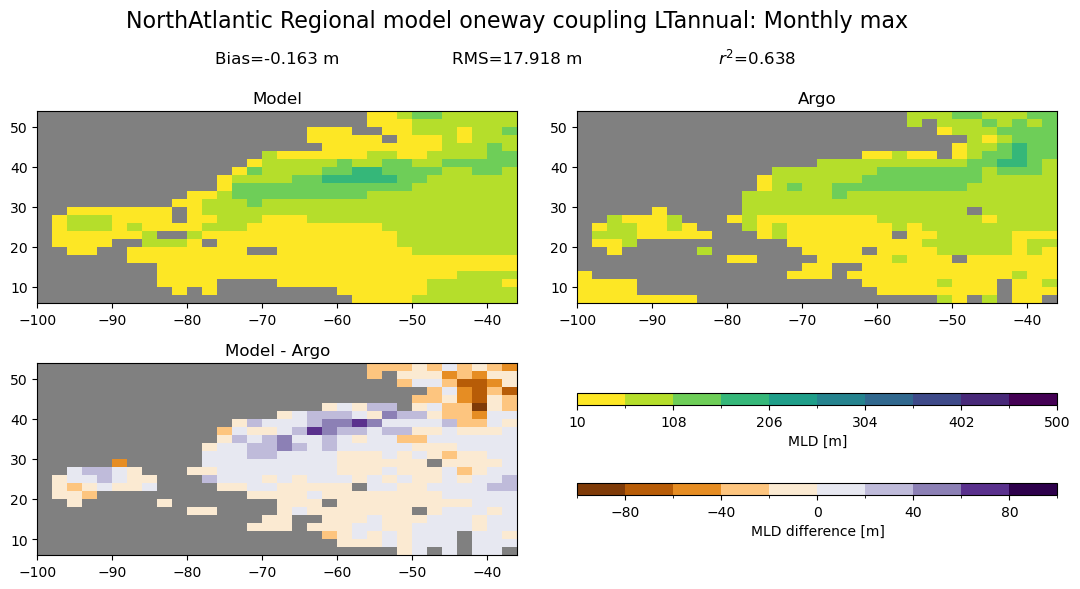

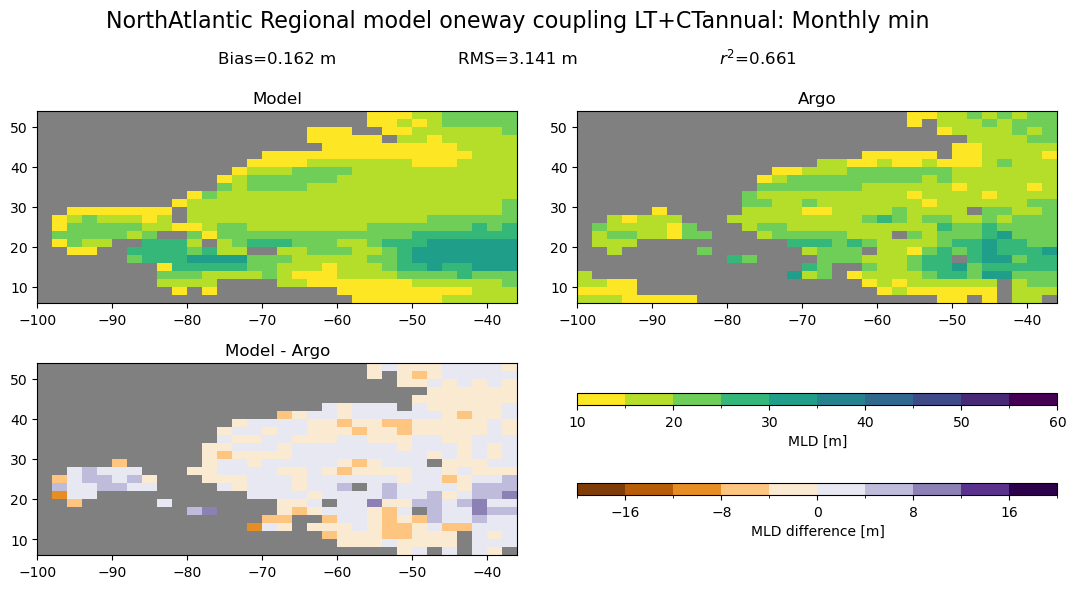

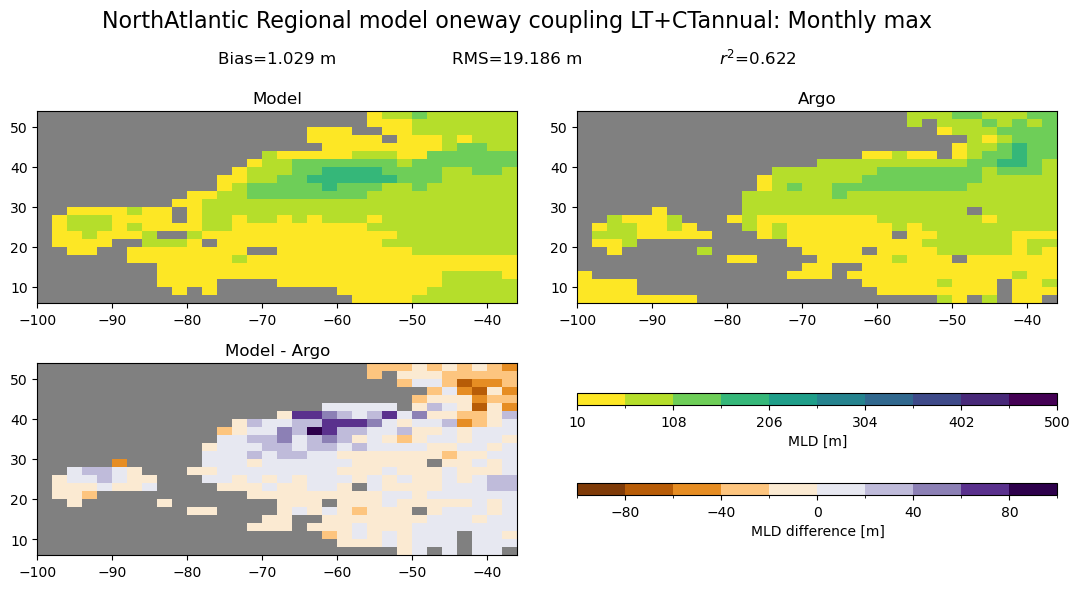

In [1]:
##only need to run this cell
import xarray as xr
import os
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import cmocean
import copy 
import glob
import subprocess

import xesmf as xe
def comparison_mean (pp_root_uncou,expName):
    def read_and_extract_monthly_climatology(pp_root, data_list, variables):
        monthly_climatology = {var: [] for var in variables}
    
        for var_name in variables:
            # Initialize accumulators for each month (1 to 12)
            monthly_sum = {m: 0 for m in range(1, 13)}
            monthly_count = {m: 0 for m in range(1, 13)}
    
            for file_path in data_list:
                file_path = os.path.join(pp_root, file_path)
                if os.path.exists(file_path):
                    try:
                        ds = xr.open_dataset(file_path)
                        if var_name in ds:
                            var = ds[var_name]
    
                            # Group by month
                            for m in range(1, 13):
                                monthly_data = var.sel(time=var['time'].dt.month == m)
                                if monthly_data.time.size > 0:
                                    valid_data = monthly_data.where(~np.isnan(monthly_data), drop=False)
                                    month_sum = valid_data.sum(dim='time', skipna=True)
                                    month_count = valid_data.notnull().sum(dim='time')
    
                                    monthly_sum[m] += month_sum
                                    monthly_count[m] += month_count
                        ds.close()
    
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                else:
                    print(f"File not found: {file_path}")
    
            # Combine to get the climatological monthly average
            monthly_climatology[var_name] = [monthly_sum[m] / monthly_count[m] if monthly_count[m] is not None else None for m in range(1, 13)]
    
        return monthly_climatology
    Mdata_list = [
        '20040101_results/20040101.ocean_month.nc',
        '20050101_results/20050101.ocean_month.nc',
        '20060101_results/20060101.ocean_month.nc',
        '20070101_results/20070101.ocean_month.nc',
        '20080101_results/20080101.ocean_month.nc',
        '20090101_results/20090101.ocean_month.nc',
        '20100101_results/20100101.ocean_month.nc',
        '20110101_results/20110101.ocean_month.nc',
        '20120101_results/20120101.ocean_month.nc',
        '20130101_results/20130101.ocean_month.nc',
        '20140101_results/20140101.ocean_month.nc',
        '20150101_results/20150101.ocean_month.nc',
        '20160101_results/20160101.ocean_month.nc',
        '20170101_results/20170101.ocean_month.nc',
        '20180101_results/20180101.ocean_month.nc',
        '20190101_results/20190101.ocean_month.nc',
        '20200101_results/20200101.ocean_month.nc',
        '20210101_results/20210101.ocean_month.nc',
        '20220101_results/20220101.ocean_month.nc',
    
    ]
    monthly_means=read_and_extract_monthly_climatology(pp_root_uncou, Mdata_list, ['MLD_EN1'])
    ds_modeldata = xr.concat(monthly_means['MLD_EN1'], dim='month')
    ds_modeldata['month'] = np.arange(1, 13)  # Assign month coords
    ds_uncou_grid=xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_static.nc")[['geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v','geolon','geolat']]
    static = ds_uncou_grid
    Dims = [-100,-35,5,55]
    Central = 0.5*(Dims[0]+Dims[1])
    CLim1_min=[10,60]
    CLim2_min=[-20,20]
    CLim1_max=[10,500]
    CLim2_max=[-100,100]
    

    Options = {
        'experiment name':expName,
        'Dims':Dims,
        'central':Central,
        'CLim1_min':CLim1_min,
        'CLim2_min':CLim2_min,
        'CLim1_max':CLim1_max,
        'CLim2_max':CLim2_max,
    }
      
    obs_en1 = '/net3/bgr/Datasets/Argo/MLDs_v2/Argo_MLD.mld_pe_anomaly_25.nc'
    ds_en1= xr.open_dataset(obs_en1)
    MLD_argo=ds_en1
    t_argo=MLD_argo.variables['Month']
    MLD_argo = MLD_argo.assign_coords(Lon=((MLD_argo.Lon + 180) % 360 - 180))
    MLD_argo = MLD_argo.sortby("Lon")
    argo_lat=MLD_argo.variables['Lat']
    argo_lon=MLD_argo.variables['Lon']
    MLD_argo=MLD_argo.variables['MLD_mean']
    MLD_argo=xr.DataArray(MLD_argo, dims=["Month", "Lon", "Lat"],coords={'Month': t_argo.values,'Lon': argo_lon.values, 'Lat': argo_lat.values})
    
    
    ds_obsdata = xr.Dataset()
    ds_obsdata['lat']=MLD_argo['Lat'].values
    ds_obsdata['lon']=MLD_argo['Lon'].values
    ds_obsdata['Month']=MLD_argo['Month'].values
    ds_obsdata['MLD_EN1']=(('Month','lon','lat'),MLD_argo.values)
    def Set_Plot_ds(cmn_lat,cmn_lon):
        #Using the obs to build the plotting grid
        #Can xarray handle periodic slicing domains?  I'm not sure so adjusting.
        ds_plot = xr.Dataset()
        ds_plot['lat'] = cmn_lat
        ds_plot['lon'] = cmn_lon
        
        return ds_plot
    
    obs_lat = np.copy(ds_obsdata['lat'])
    obs_lon = np.copy(ds_obsdata['lon'])
    obs_lon[obs_lon<Options['Dims'][0]]+=360
    obs_lon[obs_lon>Options['Dims'][1]]-=360
    xi = np.argsort(obs_lon)
    obs_lon_sort = obs_lon[xi]
    lonlims = np.where((obs_lon_sort>Options['Dims'][0])&
                       (obs_lon_sort<Options['Dims'][1]))[0]
    latlims = np.where((obs_lat>Options['Dims'][2])&
                       (obs_lat<Options['Dims'][3]))[0]
    cmn_lat = obs_lat[latlims]
    cmn_lon = obs_lon_sort[lonlims]
    
    ds_min = Set_Plot_ds(cmn_lat,cmn_lon)
    ds_max = Set_Plot_ds(cmn_lat,cmn_lon)
    # print('ds_min',ds_min)
    # print('ds_max',ds_max)
    
    model = xr.Dataset()
    model["yh"]=ds_modeldata.yh.values
    model["xh"]=ds_modeldata.xh.values
    
    model["MLD_min"]=(('yh','xh'),ds_modeldata.min(dim='month').values)
    model["MLD_max"]=(('yh','xh'),ds_modeldata.max(dim='month').values)
    model = model.assign_coords(lon=(('yh','xh'),ds_uncou_grid['geolon'].values))
    model = model.assign_coords(lat=(('yh','xh'),ds_uncou_grid['geolat'].values))
    
    
    obs = xr.Dataset()
    obs['lat']=ds_obsdata['lat'].values
    obs['lon']=ds_obsdata['lon'].values
    
    obs["MLD_min"]=(('lat','lon'),ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T)
    obs["MLD_max"]=(('lat','lon'),ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T)
    
    
    regridder_mod = xe.Regridder(model, ds_min, "bilinear",ignore_degenerate=True,extrap_method=None)
    
    ds_min['model'] = (('lat','lon'),regridder_mod(model.MLD_min.data))
    
    ds_min['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))
    
    ds_max['model'] = (('lat','lon'),regridder_mod(model.MLD_max.data))
    
    ds_max['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))
    
    ds_min['model'] = ds_min['model'].where(~np.isnan(regridder_mod(model.MLD_min.data)))
    ds_max['model'] = ds_max['model'].where(~np.isnan(regridder_mod(model.MLD_max.data)))
    ds_min['model'] = ds_min['model'].where(ds_min['model'] > 0)
    ds_max['model'] = ds_max['model'].where(ds_max['model'] > 0)
    
    def ComputeStats(ds):
        plon,plat = np.meshgrid(ds.lon.values,ds.lat.values)
        Mask = ((np.isfinite(ds.model.values))&(np.isfinite(ds.obs.values))&
               (plon>Options['Dims'][0])&
               (plon<Options['Dims'][1])&
               (plat>Options['Dims'][2])&
               (plat<Options['Dims'][3])
              )
        diff = (ds.model - ds.obs).values
        ds['bias']=np.nansum((diff[Mask]*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel())
        ds['RMS'] =np.sqrt(np.nansum((diff[Mask]**2*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel()))
        ds['r2']  =np.corrcoef(ds.model.values[Mask].ravel(),ds.obs.values[Mask].ravel())[1,0]**2
        return ds
    ds_min = ComputeStats(ds_min)
    ds_max = ComputeStats(ds_max)
    diff=xr.Dataset()    
    diff['min_bias']=ds_min['bias']
    diff['min_RMS']=ds_min['RMS']
    diff['min_r2']=ds_min['r2']
    diff['max_bias']=ds_max['bias']
    diff['max_RMS']=ds_max['RMS']
    diff['max_r2']=ds_max['r2']
    for ds_plot,method in [[ds_min,'min'],
                           [ds_max,'max']
                          ]:
        cmap = copy.copy(plt.cm.viridis_r)
        cmap2 = copy.copy(plt.cm.PuOr)
        cmap.set_bad('gray')
        cmap2.set_bad('gray')
        levels = np.linspace(Options['CLim1_'+method][0],Options['CLim1_'+method][1],11);
        levels2 = np.linspace(Options['CLim2_'+method][0],Options['CLim2_'+method][1],11);
        
        F = plt.figure(figsize=(12, 6))
        lon = ds_plot['lon'].values
        lat = ds_plot['lat'].values
        mod = ds_plot['model'].values
        obs = ds_plot['obs'].values
        dif = mod-obs
        diff[method] = xr.DataArray(dif, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon})
        lon,lat = np.meshgrid(lon,lat)
                           
        #ax=F.add_axes([0.1,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray',)
        ax=F.add_axes([0.1,0.52,0.4,0.32])
        cb0 = ax.pcolormesh(lon,
                            lat,
                            mod,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Model')
        
        # ax=F.add_axes([0.5,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.55,0.52,0.4,0.32])
        cb1 = ax.pcolormesh(lon,lat,obs,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Argo')
        
        # ax=F.add_axes([0.1,0.1,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.1,0.1,0.4,0.32])
        cb2 = ax.pcolormesh(lon,lat,dif,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap2,
                           norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False),)
        ax.set(title='Model - Argo')
        
        cax1 = F.add_axes([0.55, 0.35, 0.4, 0.02])
        cbar1 = plt.colorbar(cb1,cax=cax1,orientation='horizontal')
        cbar1.set_label('MLD [m]')
        cax2 = F.add_axes([0.55, 0.2, 0.4, 0.02])
        cbar2 = plt.colorbar(cb2,cax=cax2,orientation='horizontal')
        cbar2.set_label('MLD difference [m]')
        
        
        ax = F.add_axes([0.1,0.9,0.8,0.1])
        ax.axis('off')
        ax.set(xlim=(0,1),ylim=(0,1))
        FS=12
        ax.text(0.25,0.2,'Bias={:4.3f} m'.format(ds_plot['bias'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.5,0.2,'RMS={:4.3f} m'.format(ds_plot['RMS'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.75,0.2,'$r^2$={:4.3f}'.format(ds_plot['r2'].values),fontsize=FS,horizontalalignment='center')
        FS=16
        ax.text(0.5,0.8,Options['experiment name']+': Monthly '+method,
                fontsize=FS,horizontalalignment='center')
    return diff
        

# def comparison_mean_wave(pp_root_6_all, expName,WMdata_list):
  
#     obs_en1 = '/net3/bgr/Datasets/Argo/MLDs_v2/Argo_MLD.mld_pe_anomaly_25.nc'
#     ds_en1= xr.open_dataset(obs_en1)
#     MLD_argo=ds_en1
#     t_argo=MLD_argo.variables['Month']
#     MLD_argo = MLD_argo.assign_coords(Lon=((MLD_argo.Lon + 180) % 360 - 180))
#     MLD_argo = MLD_argo.sortby("Lon")
#     argo_lat=MLD_argo.variables['Lat']
#     argo_lon=MLD_argo.variables['Lon']
#     MLD_argo=MLD_argo.variables['MLD_mean']
#     MLD_argo=xr.DataArray(MLD_argo, dims=["Month", "Lon", "Lat"],coords={'Month': t_argo.values,'Lon': argo_lon.values, 'Lat': argo_lat.values})
    
    
#     ds_obsdata = xr.Dataset()
#     ds_obsdata['lat']=MLD_argo['Lat'].values
#     ds_obsdata['lon']=MLD_argo['Lon'].values
#     ds_obsdata['Month']=MLD_argo['Month'].values
#     ds_obsdata['MLD_EN1']=(('Month','lon','lat'),MLD_argo.values)

#     def read_and_extract_monthly_climatology_wave(pp_root, data_list, variables):
#         monthly_climatology = {var: [] for var in variables}
        
#         for var_name in variables:
#             monthly_sum = {m: None for m in range(1, 13)}
#             monthly_count = {m: None for m in range(1, 13)}
    
#             for file_path in data_list:
#                 file_path = os.path.join(pp_root, file_path)
#                 if os.path.exists(file_path):
#                     try:
#                         ds = xr.open_dataset(file_path)
#                         if var_name in ds:
#                             var = ds[var_name]
    
#                             for m in range(1, 13):
#                                 monthly_data = var.sel(time=var['time'].dt.month == m)
#                                 if monthly_data.time.size > 0:
#                                     valid_data = monthly_data.where(~np.isnan(monthly_data), drop=False)
#                                     month_sum = valid_data.sum(dim='time', skipna=True)
#                                     month_count = valid_data.notnull().sum(dim='time')
    
#                                     if monthly_sum[m] is None:
#                                         monthly_sum[m] = month_sum
#                                         monthly_count[m] = month_count
#                                     else:
#                                         monthly_sum[m] += month_sum
#                                         monthly_count[m] += month_count
#                         ds.close()
#                     except Exception as e:
#                         print(f"Error reading {file_path}: {e}")
#                 else:
#                     print(f"File not found: {file_path}")
    
#             # Finalize the monthly averages
#             result = []
#             for m in range(1, 13):
#                 if (monthly_sum[m] is not None) and (monthly_count[m] is not None):
#                     result.append(monthly_sum[m] / monthly_count[m])
#                 else:
#                     result.append(None)  # Or use a filled NaN array if desired
    
#             monthly_climatology[var_name] = result
    
#         return monthly_climatology

#     ds_data_1=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_month.nc")
#     model_grid_x = ds_data_1.variables['xh'] ##long -100 to -35 xh
#     model_grid_y = ds_data_1.variables['yh'] ## latitude 5 to 55 
#     ds_uncou_grid=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_static.nc")[['geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v','geolon','geolat']]
#     ds_wave=read_and_extract_monthly_climatology_wave(pp_root_6_all, WMdata_list, ['MLD_EN1'])
#     ds_modeldata = xr.concat(ds_wave['MLD_EN1'], dim='month')
#     ds_modeldata['month'] = np.arange(1, 13)  # Assign month coords
#     static = ds_uncou_grid
#     Dims = [-100,-35,5,55]
#     Central = 0.5*(Dims[0]+Dims[1])
#     CLim1_min=[10,60]
#     CLim2_min=[-20,20]
#     CLim1_max=[10,500]
#     CLim2_max=[-100,100]
    

#     Options = {
#         'experiment name':expName,
#         'Dims':Dims,
#         'central':Central,
#         'CLim1_min':CLim1_min,
#         'CLim2_min':CLim2_min,
#         'CLim1_max':CLim1_max,
#         'CLim2_max':CLim2_max,
#     }
#     def Set_Plot_ds(cmn_lat,cmn_lon):
#         #Using the obs to build the plotting grid
#         #Can xarray handle periodic slicing domains?  I'm not sure so adjusting.
#         ds_plot = xr.Dataset()
#         ds_plot['lat'] = cmn_lat
#         ds_plot['lon'] = cmn_lon
        
#         return ds_plot
    
#     obs_lat = np.copy(ds_obsdata['lat'])
#     obs_lon = np.copy(ds_obsdata['lon'])
#     obs_lon[obs_lon<Options['Dims'][0]]+=360
#     obs_lon[obs_lon>Options['Dims'][1]]-=360
#     xi = np.argsort(obs_lon)
#     obs_lon_sort = obs_lon[xi]
#     lonlims = np.where((obs_lon_sort>Options['Dims'][0])&
#                        (obs_lon_sort<Options['Dims'][1]))[0]
#     latlims = np.where((obs_lat>Options['Dims'][2])&
#                        (obs_lat<Options['Dims'][3]))[0]
#     cmn_lat = obs_lat[latlims]
#     cmn_lon = obs_lon_sort[lonlims]
    
#     ds_min = Set_Plot_ds(cmn_lat,cmn_lon)
#     ds_max = Set_Plot_ds(cmn_lat,cmn_lon)
    
    
#     model = xr.Dataset()
#     model["yh"]=ds_modeldata.yh.values
#     model["xh"]=ds_modeldata.xh.values
    
#     model["MLD_min"]=(('yh','xh'),ds_modeldata.min(dim='month').values)
#     model["MLD_max"]=(('yh','xh'),ds_modeldata.max(dim='month').values)
#     model = model.assign_coords(lon=(('yh','xh'),ds_uncou_grid['geolon'].values))
#     model = model.assign_coords(lat=(('yh','xh'),ds_uncou_grid['geolat'].values))
    
#     obs = xr.Dataset()
#     obs['lat']=ds_obsdata['lat'].values
#     obs['lon']=ds_obsdata['lon'].values
    
#     obs["MLD_min"]=(('lat','lon'),ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T)
#     obs["MLD_max"]=(('lat','lon'),ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T)
    
#     regridder_mod = xe.Regridder(model, ds_min, "bilinear",ignore_degenerate=True,extrap_method=None)
    
#     ds_min['model'] = (('lat','lon'),regridder_mod(model.MLD_min.data))
    
#     ds_min['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))
    
#     ds_max['model'] = (('lat','lon'),regridder_mod(model.MLD_max.data))
    
#     ds_max['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))

#     ds_min['model'] = ds_min['model'].where(~np.isnan(regridder_mod(model.MLD_min.data)))
#     ds_max['model'] = ds_max['model'].where(~np.isnan(regridder_mod(model.MLD_max.data)))
#     ds_min['model'] = ds_min['model'].where(ds_min['model'] > 0)
#     ds_max['model'] = ds_max['model'].where(ds_max['model'] > 0)     
    
#     def ComputeStats(ds):
#         plon,plat = np.meshgrid(ds.lon.values,ds.lat.values)
#         Mask = ((np.isfinite(ds.model.values))&(np.isfinite(ds.obs.values))&
#                (plon>Options['Dims'][0])&
#                (plon<Options['Dims'][1])&
#                (plat>Options['Dims'][2])&
#                (plat<Options['Dims'][3])
#               )
#         diff = (ds.model - ds.obs).values
#         ds['bias']=np.nansum((diff[Mask]*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel())
#         ds['RMS'] =np.sqrt(np.nansum((diff[Mask]**2*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel()))
#         ds['r2']  =np.corrcoef(ds.model.values[Mask].ravel(),ds.obs.values[Mask].ravel())[1,0]**2
#         return ds
#     ds_min = ComputeStats(ds_min)
#     ds_max = ComputeStats(ds_max)
#     diff=xr.Dataset()    
#     diff['min_bias']=ds_min['bias']
#     diff['min_RMS']=ds_min['RMS']
#     diff['min_r2']=ds_min['r2']
#     diff['max_bias']=ds_max['bias']
#     diff['max_RMS']=ds_max['RMS']
#     diff['max_r2']=ds_max['r2']
#     for ds_plot,method in [[ds_min,'min'],
#                            [ds_max,'max']
#                           ]:
#         cmap = copy.copy(plt.cm.viridis_r)
#         cmap2 = copy.copy(plt.cm.PuOr)
#         cmap.set_bad('gray')
#         cmap2.set_bad('gray')
#         levels = np.linspace(Options['CLim1_'+method][0],Options['CLim1_'+method][1],11);
#         levels2 = np.linspace(Options['CLim2_'+method][0],Options['CLim2_'+method][1],11);
        
#         F = plt.figure(figsize=(12, 6))
#         lon = ds_plot['lon'].values
#         lat = ds_plot['lat'].values
#         mod = ds_plot['model'].values
#         obs = ds_plot['obs'].values
#         dif = mod-obs
#         diff[method] = xr.DataArray(dif, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon})
#         lon,lat = np.meshgrid(lon,lat)
                           
#         #ax=F.add_axes([0.1,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray',)
#         ax=F.add_axes([0.1,0.52,0.4,0.32])
#         cb0 = ax.pcolormesh(lon,
#                             lat,
#                             mod,
#                            shading="auto", 
#                            #transform=ccrs.PlateCarree(),
#                            cmap=cmap,
#                            norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
#         ax.set_title('Model')
        
#         # ax=F.add_axes([0.5,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
#         ax=F.add_axes([0.55,0.52,0.4,0.32])
#         cb1 = ax.pcolormesh(lon,lat,obs,
#                            shading="auto", 
#                            #transform=ccrs.PlateCarree(),
#                            cmap=cmap,
#                            norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
#         ax.set_title('Argo')
        
#         # ax=F.add_axes([0.1,0.1,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
#         ax=F.add_axes([0.1,0.1,0.4,0.32])
#         cb2 = ax.pcolormesh(lon,lat,dif,
#                            shading="auto", 
#                            #transform=ccrs.PlateCarree(),
#                            cmap=cmap2,
#                            norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False),)
#         ax.set(title='Model - Argo')
        
#         cax1 = F.add_axes([0.55, 0.35, 0.4, 0.02])
#         cbar1 = plt.colorbar(cb1,cax=cax1,orientation='horizontal')
#         cbar1.set_label('MLD [m]')
#         cax2 = F.add_axes([0.55, 0.2, 0.4, 0.02])
#         cbar2 = plt.colorbar(cb2,cax=cax2,orientation='horizontal')
#         cbar2.set_label('MLD difference [m]')
        
        
#         ax = F.add_axes([0.1,0.9,0.8,0.1])
#         ax.axis('off')
#         ax.set(xlim=(0,1),ylim=(0,1))
#         FS=12
#         ax.text(0.25,0.2,'Bias={:4.3f} m'.format(ds_plot['bias'].values),fontsize=FS,horizontalalignment='center')
#         ax.text(0.5,0.2,'RMS={:4.3f} m'.format(ds_plot['RMS'].values),fontsize=FS,horizontalalignment='center')
#         ax.text(0.75,0.2,'$r^2$={:4.3f}'.format(ds_plot['r2'].values),fontsize=FS,horizontalalignment='center')
#         FS=16
#         ax.text(0.5,0.8,Options['experiment name']+': Monthly '+method,
#                 fontsize=FS,horizontalalignment='center')
#     return diff        



    
def comparison_mean_wave_targetmonth(pp_root_6_all, expName,WMdata_list,target_months=None,period_name=' '):
    if target_months is None:
        target_months = list(range(1, 13))
    obs_en1 = '/net3/bgr/Datasets/Argo/MLDs_v2/Argo_MLD.mld_pe_anomaly_25.nc'
    ds_en1= xr.open_dataset(obs_en1)
    
    MLD_argo=ds_en1
    t_argo=MLD_argo.variables['Month']
    MLD_argo = MLD_argo.assign_coords(Lon=((MLD_argo.Lon + 180) % 360 - 180))
    MLD_argo = MLD_argo.sortby("Lon")
    argo_lat=MLD_argo.variables['Lat']
    argo_lon=MLD_argo.variables['Lon']
    MLD_argo=MLD_argo.variables['MLD_mean']
    MLD_argo=xr.DataArray(MLD_argo, dims=["Month", "Lon", "Lat"],coords={'Month': t_argo.values,'Lon': argo_lon.values, 'Lat': argo_lat.values})
    MLD_argo_selected = MLD_argo.sel(Month=MLD_argo['Month'].isin(target_months))

    ds_obsdata = xr.Dataset()
    ds_obsdata['lat']=MLD_argo['Lat'].values
    ds_obsdata['lon']=MLD_argo['Lon'].values
    ds_obsdata['Month']=MLD_argo_selected['Month'].values
    ds_obsdata['MLD_EN1']=(('Month','lon','lat'),MLD_argo_selected.values)

    def read_and_extract_monthly_climatology_wave(pp_root, data_list, variables, target_months):

    
        monthly_climatology = {var: [] for var in variables}
        
        for var_name in variables:
            monthly_sum = {m: None for m in target_months}
            monthly_count = {m: None for m in target_months}
    
            for file_path in data_list:
                file_path = os.path.join(pp_root, file_path)
                if os.path.exists(file_path):
                    try:
                        ds = xr.open_dataset(file_path)
                        if var_name in ds:
                            var = ds[var_name]
    
                            for m in target_months:
                                monthly_data = var.sel(time=var['time'].dt.month == m)
                                if monthly_data.time.size > 0:
                                    valid_data = monthly_data.where(~np.isnan(monthly_data), drop=False)
                                    month_sum = valid_data.sum(dim='time', skipna=True)
                                    month_count = valid_data.notnull().sum(dim='time')
    
                                    if monthly_sum[m] is None:
                                        monthly_sum[m] = month_sum
                                        monthly_count[m] = month_count
                                    else:
                                        monthly_sum[m] += month_sum
                                        monthly_count[m] += month_count
                        ds.close()
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                else:
                    print(f"File not found: {file_path}")
    
            result = []
            for m in target_months:
                if (monthly_sum[m] is not None) and (monthly_count[m] is not None):
                    result.append(monthly_sum[m] / monthly_count[m])
                else:
                    result.append(None)
    
            monthly_climatology[var_name] = result
    
        return monthly_climatology

    ds_data_1=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_month.nc")
    model_grid_x = ds_data_1.variables['xh'] ##long -100 to -35 xh
    model_grid_y = ds_data_1.variables['yh'] ## latitude 5 to 55 
    ds_uncou_grid=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_static.nc")[['geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v','geolon','geolat']]
    ds_wave=read_and_extract_monthly_climatology_wave(pp_root_6_all, WMdata_list, ['MLD_EN1'],target_months)
    ds_modeldata = xr.concat(ds_wave['MLD_EN1'], dim='month')

# Assign the correct month labels
    ds_modeldata['month'] = target_months
    static = ds_uncou_grid
    Dims = [-100,-35,5,55]
    Central = 0.5*(Dims[0]+Dims[1])
    CLim1_min=[10,60]
    CLim2_min=[-20,20]
    CLim1_max=[10,500]
    CLim2_max=[-100,100]
    

    Options = {
        'experiment name':expName,
        'Dims':Dims,
        'central':Central,
        'CLim1_min':CLim1_min,
        'CLim2_min':CLim2_min,
        'CLim1_max':CLim1_max,
        'CLim2_max':CLim2_max,
    }
    def Set_Plot_ds(cmn_lat,cmn_lon):
        #Using the obs to build the plotting grid
        #Can xarray handle periodic slicing domains?  I'm not sure so adjusting.
        ds_plot = xr.Dataset()
        ds_plot['lat'] = cmn_lat
        ds_plot['lon'] = cmn_lon
        
        return ds_plot
    
    obs_lat = np.copy(ds_obsdata['lat'])
    obs_lon = np.copy(ds_obsdata['lon'])
    obs_lon[obs_lon<Options['Dims'][0]]+=360
    obs_lon[obs_lon>Options['Dims'][1]]-=360
    xi = np.argsort(obs_lon)
    obs_lon_sort = obs_lon[xi]
    lonlims = np.where((obs_lon_sort>Options['Dims'][0])&
                       (obs_lon_sort<Options['Dims'][1]))[0]
    latlims = np.where((obs_lat>Options['Dims'][2])&
                       (obs_lat<Options['Dims'][3]))[0]
    cmn_lat = obs_lat[latlims]
    cmn_lon = obs_lon_sort[lonlims]
    
    ds_min = Set_Plot_ds(cmn_lat,cmn_lon)
    ds_max = Set_Plot_ds(cmn_lat,cmn_lon)
    
    
    model = xr.Dataset()
    model["yh"]=ds_modeldata.yh.values
    model["xh"]=ds_modeldata.xh.values
    
    model["MLD_min"]=(('yh','xh'),ds_modeldata.min(dim='month').values)
    model["MLD_max"]=(('yh','xh'),ds_modeldata.max(dim='month').values)
    model = model.assign_coords(lon=(('yh','xh'),ds_uncou_grid['geolon'].values))
    model = model.assign_coords(lat=(('yh','xh'),ds_uncou_grid['geolat'].values))
    
    obs = xr.Dataset()
    obs['lat']=ds_obsdata['lat'].values
    obs['lon']=ds_obsdata['lon'].values
    
    obs["MLD_min"]=(('lat','lon'),ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T)
    obs["MLD_max"]=(('lat','lon'),ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T)
    
    regridder_mod = xe.Regridder(model, ds_min, "bilinear",ignore_degenerate=True,extrap_method=None)
    
    ds_min['model'] = (('lat','lon'),regridder_mod(model.MLD_min.data))
    
    ds_min['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))
    
    ds_max['model'] = (('lat','lon'),regridder_mod(model.MLD_max.data))
    
    ds_max['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))

    ds_min['model'] = ds_min['model'].where(~np.isnan(regridder_mod(model.MLD_min.data)))
    ds_max['model'] = ds_max['model'].where(~np.isnan(regridder_mod(model.MLD_max.data)))
    ds_min['model'] = ds_min['model'].where(ds_min['model'] > 0)
    ds_max['model'] = ds_max['model'].where(ds_max['model'] > 0)     
    
    def ComputeStats(ds):
        plon,plat = np.meshgrid(ds.lon.values,ds.lat.values)
        Mask = ((np.isfinite(ds.model.values))&(np.isfinite(ds.obs.values))&
               (plon>Options['Dims'][0])&
               (plon<Options['Dims'][1])&
               (plat>Options['Dims'][2])&
               (plat<Options['Dims'][3])
              )
        diff = (ds.model - ds.obs).values
        ds['bias']=np.nansum((diff[Mask]*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel())
        ds['RMS'] =np.sqrt(np.nansum((diff[Mask]**2*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel()))
        ds['r2']  =np.corrcoef(ds.model.values[Mask].ravel(),ds.obs.values[Mask].ravel())[1,0]**2
        return ds
    ds_min = ComputeStats(ds_min)
    ds_max = ComputeStats(ds_max)
    diff=xr.Dataset()    
    diff['min_bias']=ds_min['bias']
    diff['min_RMS']=ds_min['RMS']
    diff['min_r2']=ds_min['r2']
    diff['max_bias']=ds_max['bias']
    diff['max_RMS']=ds_max['RMS']
    diff['max_r2']=ds_max['r2']
    for ds_plot,method in [[ds_min,'min'],
                           [ds_max,'max']
                          ]:
        cmap = copy.copy(plt.cm.viridis_r)
        cmap2 = copy.copy(plt.cm.PuOr)
        cmap.set_bad('gray')
        cmap2.set_bad('gray')
        levels = np.linspace(Options['CLim1_'+method][0],Options['CLim1_'+method][1],11);
        levels2 = np.linspace(Options['CLim2_'+method][0],Options['CLim2_'+method][1],11);
        
        F = plt.figure(figsize=(12, 6))
        lon = ds_plot['lon'].values
        lat = ds_plot['lat'].values
        mod = ds_plot['model'].values
        obs = ds_plot['obs'].values
        dif = mod-obs
        diff[method] = xr.DataArray(dif, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon})
        lon,lat = np.meshgrid(lon,lat)
                           
        #ax=F.add_axes([0.1,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray',)
        ax=F.add_axes([0.1,0.52,0.4,0.32])
        cb0 = ax.pcolormesh(lon,
                            lat,
                            mod,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Model')
        
        # ax=F.add_axes([0.5,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.55,0.52,0.4,0.32])
        cb1 = ax.pcolormesh(lon,lat,obs,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Argo')
        
        # ax=F.add_axes([0.1,0.1,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.1,0.1,0.4,0.32])
        cb2 = ax.pcolormesh(lon,lat,dif,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap2,
                           norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False),)
        ax.set(title='Model - Argo')
        
        cax1 = F.add_axes([0.55, 0.35, 0.4, 0.02])
        cbar1 = plt.colorbar(cb1,cax=cax1,orientation='horizontal')
        cbar1.set_label('MLD [m]')
        cax2 = F.add_axes([0.55, 0.2, 0.4, 0.02])
        cbar2 = plt.colorbar(cb2,cax=cax2,orientation='horizontal')
        cbar2.set_label('MLD difference [m]')
        
        
        ax = F.add_axes([0.1,0.9,0.8,0.1])
        ax.axis('off')
        ax.set(xlim=(0,1),ylim=(0,1))
        FS=12
        ax.text(0.25,0.2,'Bias={:4.3f} m'.format(ds_plot['bias'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.5,0.2,'RMS={:4.3f} m'.format(ds_plot['RMS'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.75,0.2,'$r^2$={:4.3f}'.format(ds_plot['r2'].values),fontsize=FS,horizontalalignment='center')
        FS=16
        ax.text(0.5,0.8,Options['experiment name']+period_name+': Monthly '+method,
                fontsize=FS,horizontalalignment='center')
    return diff  


def comparison_median_wave(pp_root_6_all,expName):
  
    obs_en1 = '/net3/bgr/Datasets/Argo/MLDs_v2/Argo_MLD.mld_pe_anomaly_25.nc'
    ds_en1= xr.open_dataset(obs_en1)
    MLD_argo=ds_en1
    t_argo=MLD_argo.variables['Month']
    MLD_argo = MLD_argo.assign_coords(Lon=((MLD_argo.Lon + 180) % 360 - 180))
    MLD_argo = MLD_argo.sortby("Lon")
    argo_lat=MLD_argo.variables['Lat']
    argo_lon=MLD_argo.variables['Lon']
    MLD_argo=MLD_argo.variables['MLD_median']
    MLD_argo=xr.DataArray(MLD_argo, dims=["Month", "Lon", "Lat"],coords={'Month': t_argo.values,'Lon': argo_lon.values, 'Lat': argo_lat.values})
    
    
    ds_obsdata = xr.Dataset()
    ds_obsdata['lat']=MLD_argo['Lat'].values
    ds_obsdata['lon']=MLD_argo['Lon'].values
    ds_obsdata['Month']=MLD_argo['Month'].values
    ds_obsdata['MLD_EN1']=(('Month','lon','lat'),MLD_argo.values)
    
    
    ds_6_all_1=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_daily.nc")
    ds_6_all_2=xr.open_dataset(pp_root_6_all+"/20040701_results/20040701.ocean_daily.nc")

    model_grid_x = ds_6_all_1.variables['xh'] ##long -100 to -35 xh
    model_grid_y = ds_6_all_1.variables['yh'] ## latitude 5 to 55 
    
    MLD_6_all_1= ds_6_all_1['MLD_EN1']
    MLD_6_all_2= ds_6_all_2['MLD_EN1']
    MLD_6_all_combine=xr.concat([MLD_6_all_1,MLD_6_all_2], dim='time')
    MLD_6_all=MLD_6_all_combine.groupby('time.month').median(dim='time')
    MLD_6_all=xr.DataArray(MLD_6_all,dims=["month", "yh", "xh"],coords={'month':t_argo.values,'xh': model_grid_x, 'yh': model_grid_y})
    
    
    ds_uncou_grid=xr.open_dataset(pp_root_6_all+"/20040101_results/20040101.ocean_static.nc")[['geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v','geolon','geolat']]
    ds_modeldata=MLD_6_all
    # ds_modeldata = ds_modeldata.groupby('time.month').mean('time')
    static = ds_uncou_grid
    
    Dims = [-100,-35,5,55]
    Central = 0.5*(Dims[0]+Dims[1])
    CLim1_min=[10,60]
    CLim2_min=[-20,20]
    CLim1_max=[10,500]
    CLim2_max=[-100,100]
    
    Options = {
        'experiment name':expName,
        'Dims':Dims,
        'central':Central,
        'CLim1_min':CLim1_min,
        'CLim2_min':CLim2_min,
        'CLim1_max':CLim1_max,
        'CLim2_max':CLim2_max,
    }
    def Set_Plot_ds(cmn_lat,cmn_lon):
        #Using the obs to build the plotting grid
        #Can xarray handle periodic slicing domains?  I'm not sure so adjusting.
        ds_plot = xr.Dataset()
        ds_plot['lat'] = cmn_lat
        ds_plot['lon'] = cmn_lon
        
        return ds_plot
    
    obs_lat = np.copy(ds_obsdata['lat'])
    obs_lon = np.copy(ds_obsdata['lon'])
    obs_lon[obs_lon<Options['Dims'][0]]+=360
    obs_lon[obs_lon>Options['Dims'][1]]-=360
    xi = np.argsort(obs_lon)
    obs_lon_sort = obs_lon[xi]
    lonlims = np.where((obs_lon_sort>Options['Dims'][0])&
                       (obs_lon_sort<Options['Dims'][1]))[0]
    latlims = np.where((obs_lat>Options['Dims'][2])&
                       (obs_lat<Options['Dims'][3]))[0]
    cmn_lat = obs_lat[latlims]
    cmn_lon = obs_lon_sort[lonlims]
    
    ds_min = Set_Plot_ds(cmn_lat,cmn_lon)
    ds_max = Set_Plot_ds(cmn_lat,cmn_lon)
    
    
    model = xr.Dataset()
    model["yh"]=ds_modeldata.yh.values
    model["xh"]=ds_modeldata.xh.values
    
    model["MLD_min"]=(('yh','xh'),ds_modeldata.min(dim='month').values)
    model["MLD_max"]=(('yh','xh'),ds_modeldata.max(dim='month').values)
    model = model.assign_coords(lon=(('yh','xh'),ds_uncou_grid['geolon'].values))
    model = model.assign_coords(lat=(('yh','xh'),ds_uncou_grid['geolat'].values))
    
    obs = xr.Dataset()
    obs['lat']=ds_obsdata['lat'].values
    obs['lon']=ds_obsdata['lon'].values
    
    obs["MLD_min"]=(('lat','lon'),ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T)
    obs["MLD_max"]=(('lat','lon'),ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T)
    
    regridder_mod = xe.Regridder(model, ds_min, "bilinear",ignore_degenerate=True,extrap_method=None)
    
    ds_min['model'] = (('lat','lon'),regridder_mod(model.MLD_min.data))
    
    ds_min['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))
    
    ds_max['model'] = (('lat','lon'),regridder_mod(model.MLD_max.data))
    
    ds_max['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))

    ds_min['model'] = ds_min['model'].where(~np.isnan(regridder_mod(model.MLD_min.data)))
    ds_max['model'] = ds_max['model'].where(~np.isnan(regridder_mod(model.MLD_max.data)))
    ds_min['model'] = ds_min['model'].where(ds_min['model'] > 0)
    ds_max['model'] = ds_max['model'].where(ds_max['model'] > 0)
    
    def ComputeStats(ds):
        plon,plat = np.meshgrid(ds.lon.values,ds.lat.values)
        Mask = ((np.isfinite(ds.model.values))&(np.isfinite(ds.obs.values))&
               (plon>Options['Dims'][0])&
               (plon<Options['Dims'][1])&
               (plat>Options['Dims'][2])&
               (plat<Options['Dims'][3])
              )
        diff = (ds.model - ds.obs).values
        ds['bias']=np.nansum((diff[Mask]*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel())
        ds['RMS'] =np.sqrt(np.nansum((diff[Mask]**2*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel()))
        ds['r2']  =np.corrcoef(ds.model.values[Mask].ravel(),ds.obs.values[Mask].ravel())[1,0]**2
        return ds
    ds_min = ComputeStats(ds_min)
    ds_max = ComputeStats(ds_max)
    diff=xr.Dataset()   
    diff['min_bias']=ds_min['bias']
    diff['min_RMS']=ds_min['RMS']
    diff['min_r2']=ds_min['r2']
    diff['max_bias']=ds_max['bias']
    diff['max_RMS']=ds_max['RMS']
    diff['max_r2']=ds_max['r2']
    for ds_plot,method in [[ds_min,'min'],
                           [ds_max,'max']
                          ]:
        cmap = copy.copy(plt.cm.viridis_r)
        cmap2 = copy.copy(plt.cm.PuOr)
        cmap.set_bad('gray')
        cmap2.set_bad('gray')
        levels = np.linspace(Options['CLim1_'+method][0],Options['CLim1_'+method][1],11);
        levels2 = np.linspace(Options['CLim2_'+method][0],Options['CLim2_'+method][1],11);
        
        F = plt.figure(figsize=(12, 6))
        lon = ds_plot['lon'].values
        lat = ds_plot['lat'].values
        mod = ds_plot['model'].values
        obs = ds_plot['obs'].values
        dif = mod-obs
        diff[method] = xr.DataArray(dif, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon})
        lon,lat = np.meshgrid(lon,lat)
                           
        #ax=F.add_axes([0.1,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray',)
        ax=F.add_axes([0.1,0.52,0.4,0.32])
        cb0 = ax.pcolormesh(lon,
                            lat,
                            mod,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Model')
        
        # ax=F.add_axes([0.5,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.55,0.52,0.4,0.32])
        cb1 = ax.pcolormesh(lon,lat,obs,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Argo')
        
        # ax=F.add_axes([0.1,0.1,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.1,0.1,0.4,0.32])
        cb2 = ax.pcolormesh(lon,lat,dif,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap2,
                           norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False),)
        ax.set(title='Model - Argo')
        
        cax1 = F.add_axes([0.55, 0.35, 0.4, 0.02])
        cbar1 = plt.colorbar(cb1,cax=cax1,orientation='horizontal')
        cbar1.set_label('MLD [m]')
        cax2 = F.add_axes([0.55, 0.2, 0.4, 0.02])
        cbar2 = plt.colorbar(cb2,cax=cax2,orientation='horizontal')
        cbar2.set_label('MLD difference [m]')
        
        
        ax = F.add_axes([0.1,0.9,0.8,0.1])
        ax.axis('off')
        ax.set(xlim=(0,1),ylim=(0,1))
        FS=12
        ax.text(0.25,0.2,'Bias={:4.3f} m'.format(ds_plot['bias'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.5,0.2,'RMS={:4.3f} m'.format(ds_plot['RMS'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.75,0.2,'$r^2$={:4.3f}'.format(ds_plot['r2'].values),fontsize=FS,horizontalalignment='center')
        FS=16
        ax.text(0.5,0.8,Options['experiment name']+': Monthly median '+method,
                fontsize=FS,horizontalalignment='center')
    return diff

def comparison_median (pp_root_uncou,expName):
    obs_en1 = '/net3/bgr/Datasets/Argo/MLDs_v2/Argo_MLD.mld_pe_anomaly_25.nc'
    ds_en1= xr.open_dataset(obs_en1)
    MLD_argo=ds_en1
    t_argo=MLD_argo.variables['Month']
    MLD_argo = MLD_argo.assign_coords(Lon=((MLD_argo.Lon + 180) % 360 - 180))
    MLD_argo = MLD_argo.sortby("Lon")
    argo_lat=MLD_argo.variables['Lat']
    argo_lon=MLD_argo.variables['Lon']
    MLD_argo=MLD_argo.variables['MLD_median']
    MLD_argo=xr.DataArray(MLD_argo, dims=["Month", "Lon", "Lat"],coords={'Month': t_argo.values,'Lon': argo_lon.values, 'Lat': argo_lat.values})
    
    
    ds_obsdata = xr.Dataset()
    ds_obsdata['lat']=MLD_argo['Lat'].values
    ds_obsdata['lon']=MLD_argo['Lon'].values
    ds_obsdata['Month']=MLD_argo['Month'].values
    ds_obsdata['MLD_EN1']=(('Month','lon','lat'),MLD_argo.values)

    ds_uncou=xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_daily.nc")
    model_grid_x = ds_uncou.variables['xh'] ##long -100 to -35 xh
    model_grid_y = ds_uncou.variables['yh'] ## latitude 5 to 55    
    
    
    MLD_uncou=ds_uncou['MLD_EN1'].groupby('time.month').median(dim='time')
    
    MLD_uncou=xr.DataArray(MLD_uncou,dims=["month", "yh", "xh"],coords={'month':t_argo.values,'xh': model_grid_x, 'yh': model_grid_y})
    
    ds_uncou_grid=xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_static.nc")[['geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v','geolon','geolat']]
    ds_modeldata=MLD_uncou
    # ds_modeldata = ds_modeldata.groupby('time.month').mean('time')
    static = ds_uncou_grid
    Dims = [-100,-35,5,55]
    Central = 0.5*(Dims[0]+Dims[1])
    CLim1_min=[10,60]
    CLim2_min=[-20,20]
    CLim1_max=[10,500]
    CLim2_max=[-100,100]

    Options = {
        'experiment name':expName,
        'Dims':Dims,
        'central':Central,
        'CLim1_min':CLim1_min,
        'CLim2_min':CLim2_min,
        'CLim1_max':CLim1_max,
        'CLim2_max':CLim2_max,
    }
    def Set_Plot_ds(cmn_lat,cmn_lon):
        #Using the obs to build the plotting grid
        #Can xarray handle periodic slicing domains?  I'm not sure so adjusting.
        ds_plot = xr.Dataset()
        ds_plot['lat'] = cmn_lat
        ds_plot['lon'] = cmn_lon
        
        return ds_plot
    
    obs_lat = np.copy(ds_obsdata['lat'])
    obs_lon = np.copy(ds_obsdata['lon'])
    obs_lon[obs_lon<Options['Dims'][0]]+=360
    obs_lon[obs_lon>Options['Dims'][1]]-=360
    xi = np.argsort(obs_lon)
    obs_lon_sort = obs_lon[xi]
    lonlims = np.where((obs_lon_sort>Options['Dims'][0])&
                       (obs_lon_sort<Options['Dims'][1]))[0]
    latlims = np.where((obs_lat>Options['Dims'][2])&
                       (obs_lat<Options['Dims'][3]))[0]
    cmn_lat = obs_lat[latlims]
    cmn_lon = obs_lon_sort[lonlims]
    
    ds_min = Set_Plot_ds(cmn_lat,cmn_lon)
    ds_max = Set_Plot_ds(cmn_lat,cmn_lon)
    
    model = xr.Dataset()
    model["yh"]=ds_modeldata.yh.values
    model["xh"]=ds_modeldata.xh.values
    
    model["MLD_min"]=(('yh','xh'),ds_modeldata.min(dim='month').values)
    model["MLD_max"]=(('yh','xh'),ds_modeldata.max(dim='month').values)
    model = model.assign_coords(lon=(('yh','xh'),ds_uncou_grid['geolon'].values))
    model = model.assign_coords(lat=(('yh','xh'),ds_uncou_grid['geolat'].values))
    
    obs = xr.Dataset()
    obs['lat']=ds_obsdata['lat'].values
    obs['lon']=ds_obsdata['lon'].values
    
    obs["MLD_min"]=(('lat','lon'),ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T)
    obs["MLD_max"]=(('lat','lon'),ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T)
    
    regridder_mod = xe.Regridder(model, ds_min, "bilinear",ignore_degenerate=True,extrap_method=None)
    
    ds_min['model'] = (('lat','lon'),regridder_mod(model.MLD_min.data))
    
    ds_min['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.min(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))
    
    ds_max['model'] = (('lat','lon'),regridder_mod(model.MLD_max.data))
    
    ds_max['obs'] = (('lat','lon'),((ds_obsdata.MLD_EN1.max(dim='Month',skipna=False).values.T[:,xi])[latlims[0]:latlims[-1]+1,lonlims[0]:lonlims[-1]+1]))

    ds_min['model'] = ds_min['model'].where(~np.isnan(regridder_mod(model.MLD_min.data)))
    ds_max['model'] = ds_max['model'].where(~np.isnan(regridder_mod(model.MLD_max.data)))
    ds_min['model'] = ds_min['model'].where(ds_min['model'] > 0)
    ds_max['model'] = ds_max['model'].where(ds_max['model'] > 0)
    
    def ComputeStats(ds):
        plon,plat = np.meshgrid(ds.lon.values,ds.lat.values)
        Mask = ((np.isfinite(ds.model.values))&(np.isfinite(ds.obs.values))&
               (plon>Options['Dims'][0])&
               (plon<Options['Dims'][1])&
               (plat>Options['Dims'][2])&
               (plat<Options['Dims'][3])
              )
        diff = (ds.model - ds.obs).values
        ds['bias']=np.nansum((diff[Mask]*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel())
        ds['RMS'] =np.sqrt(np.nansum((diff[Mask]**2*np.cos(plat[Mask]*np.pi/180.)).ravel())/np.nansum((np.cos(plat[Mask]*np.pi/180.)).ravel()))
        ds['r2']  =np.corrcoef(ds.model.values[Mask].ravel(),ds.obs.values[Mask].ravel())[1,0]**2
        return ds
    ds_min = ComputeStats(ds_min)
    ds_max = ComputeStats(ds_max)
    diff=xr.Dataset()  
    diff['min_bias']=ds_min['bias']
    diff['min_RMS']=ds_min['RMS']
    diff['min_r2']=ds_min['r2']
    diff['max_bias']=ds_max['bias']
    diff['max_RMS']=ds_max['RMS']
    diff['max_r2']=ds_max['r2']
    for ds_plot,method in [[ds_min,'min'],
                           [ds_max,'max']
                          ]:
        cmap = copy.copy(plt.cm.viridis_r)
        cmap2 = copy.copy(plt.cm.PuOr)
        cmap.set_bad('gray')
        cmap2.set_bad('gray')
        levels = np.linspace(Options['CLim1_'+method][0],Options['CLim1_'+method][1],11);
        levels2 = np.linspace(Options['CLim2_'+method][0],Options['CLim2_'+method][1],11);
        
        F = plt.figure(figsize=(12, 6))
        lon = ds_plot['lon'].values
        lat = ds_plot['lat'].values
        mod = ds_plot['model'].values
        obs = ds_plot['obs'].values
        dif = mod-obs
        diff[method] = xr.DataArray(dif, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon})
        lon,lat = np.meshgrid(lon,lat)
                           
        #ax=F.add_axes([0.1,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray',)
        ax=F.add_axes([0.1,0.52,0.4,0.32])
        cb0 = ax.pcolormesh(lon,
                            lat,
                            mod,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Model')
        
        # ax=F.add_axes([0.5,0.52,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.55,0.52,0.4,0.32])
        cb1 = ax.pcolormesh(lon,lat,obs,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap,
                           norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False),)
        ax.set_title('Argo')
        
        # ax=F.add_axes([0.1,0.1,0.425,0.32],projection=ccrs.Robinson(central_longitude=Options['central']),facecolor='gray')
        ax=F.add_axes([0.1,0.1,0.4,0.32])
        cb2 = ax.pcolormesh(lon,lat,dif,
                           shading="auto", 
                           #transform=ccrs.PlateCarree(),
                           cmap=cmap2,
                           norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False),)
        ax.set(title='Model - Argo')
        
        cax1 = F.add_axes([0.55, 0.35, 0.4, 0.02])
        cbar1 = plt.colorbar(cb1,cax=cax1,orientation='horizontal')
        cbar1.set_label('MLD [m]')
        cax2 = F.add_axes([0.55, 0.2, 0.4, 0.02])
        cbar2 = plt.colorbar(cb2,cax=cax2,orientation='horizontal')
        cbar2.set_label('MLD difference [m]')
        
        
        ax = F.add_axes([0.1,0.9,0.8,0.1])
        ax.axis('off')
        ax.set(xlim=(0,1),ylim=(0,1))
        FS=12
        ax.text(0.25,0.2,'Bias={:4.3f} m'.format(ds_plot['bias'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.5,0.2,'RMS={:4.3f} m'.format(ds_plot['RMS'].values),fontsize=FS,horizontalalignment='center')
        ax.text(0.75,0.2,'$r^2$={:4.3f}'.format(ds_plot['r2'].values),fontsize=FS,horizontalalignment='center')
        FS=16
        ax.text(0.5,0.8,Options['experiment name']+': Monthly median'+method,
                fontsize=FS,horizontalalignment='center')
    return diff
    
pp_root_uncou = "/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou/"
pp_root_uncou_LAfalse="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou_LALTFalse/"
pp_root_12_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave_all/"
pp_root_12_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave/"
pp_root_6_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_all/"
pp_root_6_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_wave/"
pp_root_oneway_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12_oneway_all/"
pp_root_oneway="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12_oneway_dT"


expName_uncou='NorthAtlantic Regional model uncou LT'
expName_uncou_LAfalse='NorthAtlantic Regional model uncou no LT'
expName_12_all='NorthAtlantic Regional model 1/12 wave LT+CT'
expName_12_wave='NorthAtlantic Regional model 1/12 wave LT'
expName_6_all='NorthAtlantic Regional model 1/6 wave LT+CT'
expName_6_wave='NorthAtlantic Regional model 1/6 wave LT'
expName_oneway='NorthAtlantic Regional model oneway coupling LT'
expName_oneway_all='NorthAtlantic Regional model oneway coupling LT+CT'
WMdata_list = [
    '20040101_results/20040101.ocean_month.nc',
    '20040701_results/20040701.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20050701_results/20050701.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20060701_results/20060701.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20070701_results/20070701.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20080701_results/20080701.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20090701_results/20090701.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20100701_results/20100701.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20110701_results/20110701.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20120701_results/20120701.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20130701_results/20130701.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20140701_results/20140701.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20150701_results/20150701.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20160701_results/20160701.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20170701_results/20170701.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20180701_results/20180701.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20190701_results/20190701.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20200701_results/20200701.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20210701_results/20210701.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',
    '20220701_results/20220701.ocean_month.nc',
]
Mdata_list = [
    '20040101_results/20040101.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',

]
One_M_list=[
   
    '20040101_results/20040101.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20080701_results/20080701.ocean_month.nc',    
    '20090101_results/20090101.ocean_month.nc',
    '20090701_results/20090701.ocean_month.nc',    
    '20100101_results/20100101.ocean_month.nc',
    '20100701_results/20100701.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20110701_results/20110701.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20120701_results/20120701.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20130701_results/20130701.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20140701_results/20140701.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20150701_results/20150701.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20160701_results/20160701.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20170701_results/20170701.ocean_month.nc', 
]
One_M_all_list=[
 
    '20040101_results/20040101.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20050701_results/20050701.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20060701_results/20060701.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20070701_results/20070701.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20080701_results/20080701.ocean_month.nc',    
    '20090101_results/20090101.ocean_month.nc',
    '20090701_results/20090701.ocean_month.nc',    
    '20100101_results/20100101.ocean_month.nc',
    '20100701_results/20100701.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20110701_results/20110701.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20120701_results/20120701.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20130701_results/20130701.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20140701_results/20140701.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20150701_results/20150701.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20160701_results/20160701.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20170701_results/20170701.ocean_month.nc'
]
Mdata_list = [
    '20040101_results/20040101.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',

]
# dif_uncou=comparison_mean(pp_root_uncou,expName_uncou)
# dif_uncou_LAfalse=comparison_mean(pp_root_uncou_LAfalse,expName_uncou_LAfalse)
# # dif_12_all=comparison_mean_wave(pp_root_12_all,expName_12_all,WMdata_list)
# # dif_12_wave=comparison_mean_wave(pp_root_12_wave,expName_12_wave)
# dif_6_all=comparison_mean_wave(pp_root_6_all,expName_6_all,WMdata_list)
# dif_6_wave=comparison_mean_wave(pp_root_6_wave,expName_6_wave,WMdata_list)
# dif_oneway=comparison_mean_wave(pp_root_oneway,expName_oneway,One_M_list)
# dif_oneway_all=comparison_mean_wave(pp_root_oneway_all,expName_oneway_all,One_M_all_list)
target_months=[1,2,3,4,5,6,7,8,9,10,11,12]
period_name='annual'
dif_uncou=comparison_mean_wave_targetmonth(pp_root_uncou,expName_uncou,Mdata_list,target_months,period_name)
dif_uncou_LAfalse=comparison_mean_wave_targetmonth(pp_root_uncou_LAfalse,expName_uncou_LAfalse,Mdata_list,target_months,period_name)
# dif_12_all=comparison_mean_wave(pp_root_12_all,expName_12_all,WMdata_list)
# dif_12_wave=comparison_mean_wave(pp_root_12_wave,expName_12_wave)
dif_6_all=comparison_mean_wave_targetmonth(pp_root_6_all,expName_6_all,WMdata_list,target_months,period_name)
dif_6_wave=comparison_mean_wave_targetmonth(pp_root_6_wave,expName_6_wave,WMdata_list,target_months,period_name)
dif_oneway=comparison_mean_wave_targetmonth(pp_root_oneway,expName_oneway,One_M_list,target_months,period_name)
dif_oneway_all=comparison_mean_wave_targetmonth(pp_root_oneway_all,expName_oneway_all,One_M_all_list,target_months,period_name)



# dif_uncou=comparison_median(pp_root_uncou,expName_uncou)
# # dif_uncou_LAfalse=comparison_median(pp_root_uncou_LAfalse,expName_uncou_LAfalse)
# # dif_12_all=comparison_median_wave(pp_root_12_all,expName_12_all)
# # dif_12_wave=comparison_median_wave(pp_root_12_wave,expName_12_wave)
# # dif_6_all=comparison_median_wave(pp_root_6_all,expName_6_all)
# dif_6_wave=comparison_median_wave(pp_root_6_wave,expName_6_wave)
# dif_oneway=comparison_median(pp_root_oneway,expName_oneway)
# dif_oneway_all=comparison_median(pp_root_oneway_all,expName_oneway_all)



/vftmp/Qian.Xiao/pid2297540/ipykernel_2301554/2165548411.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


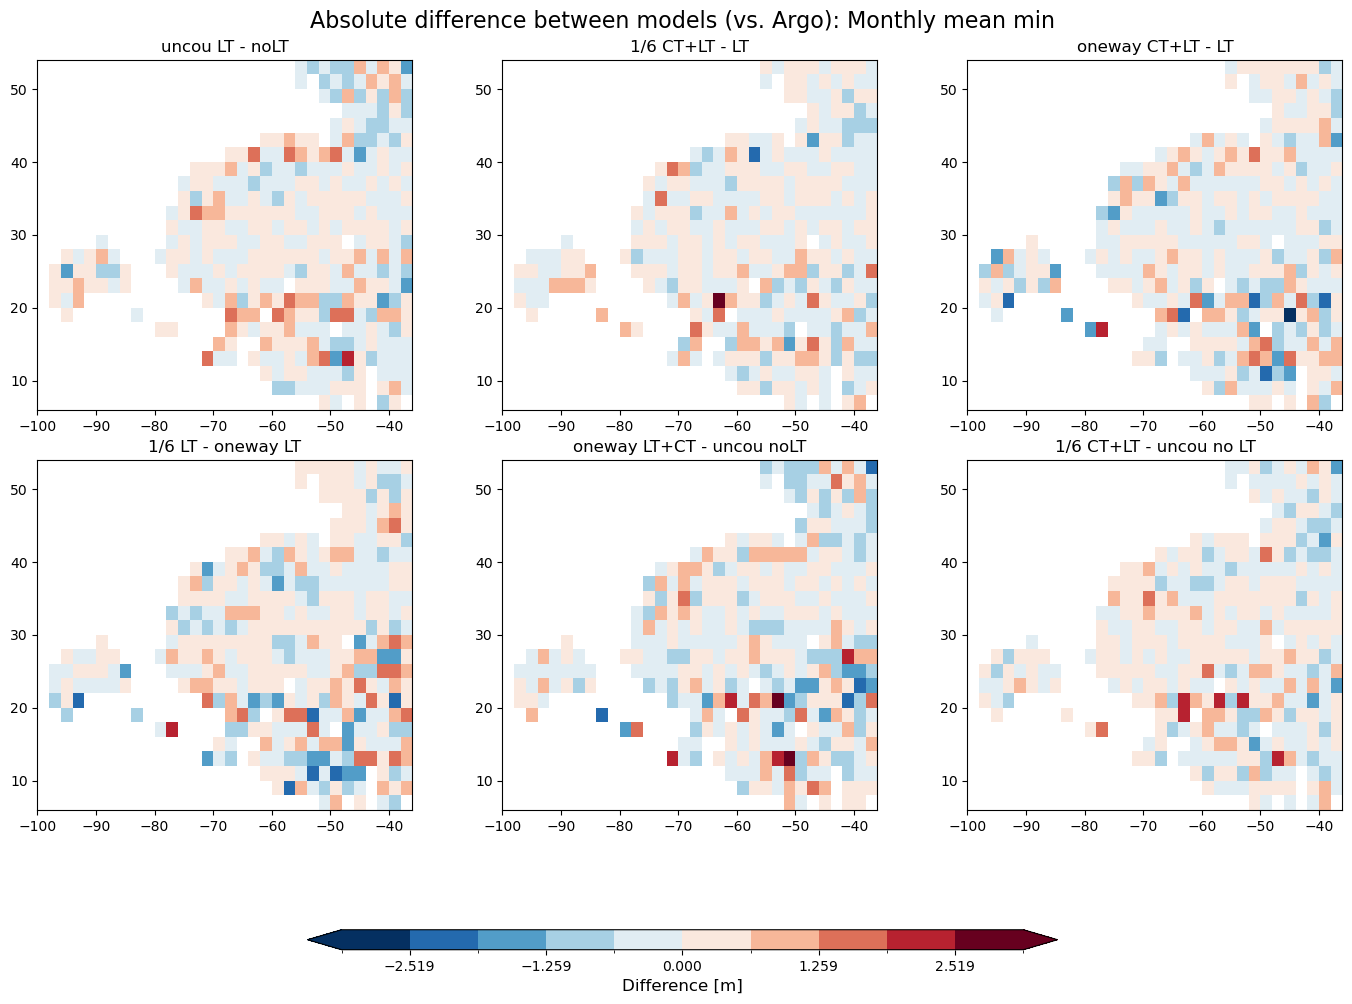

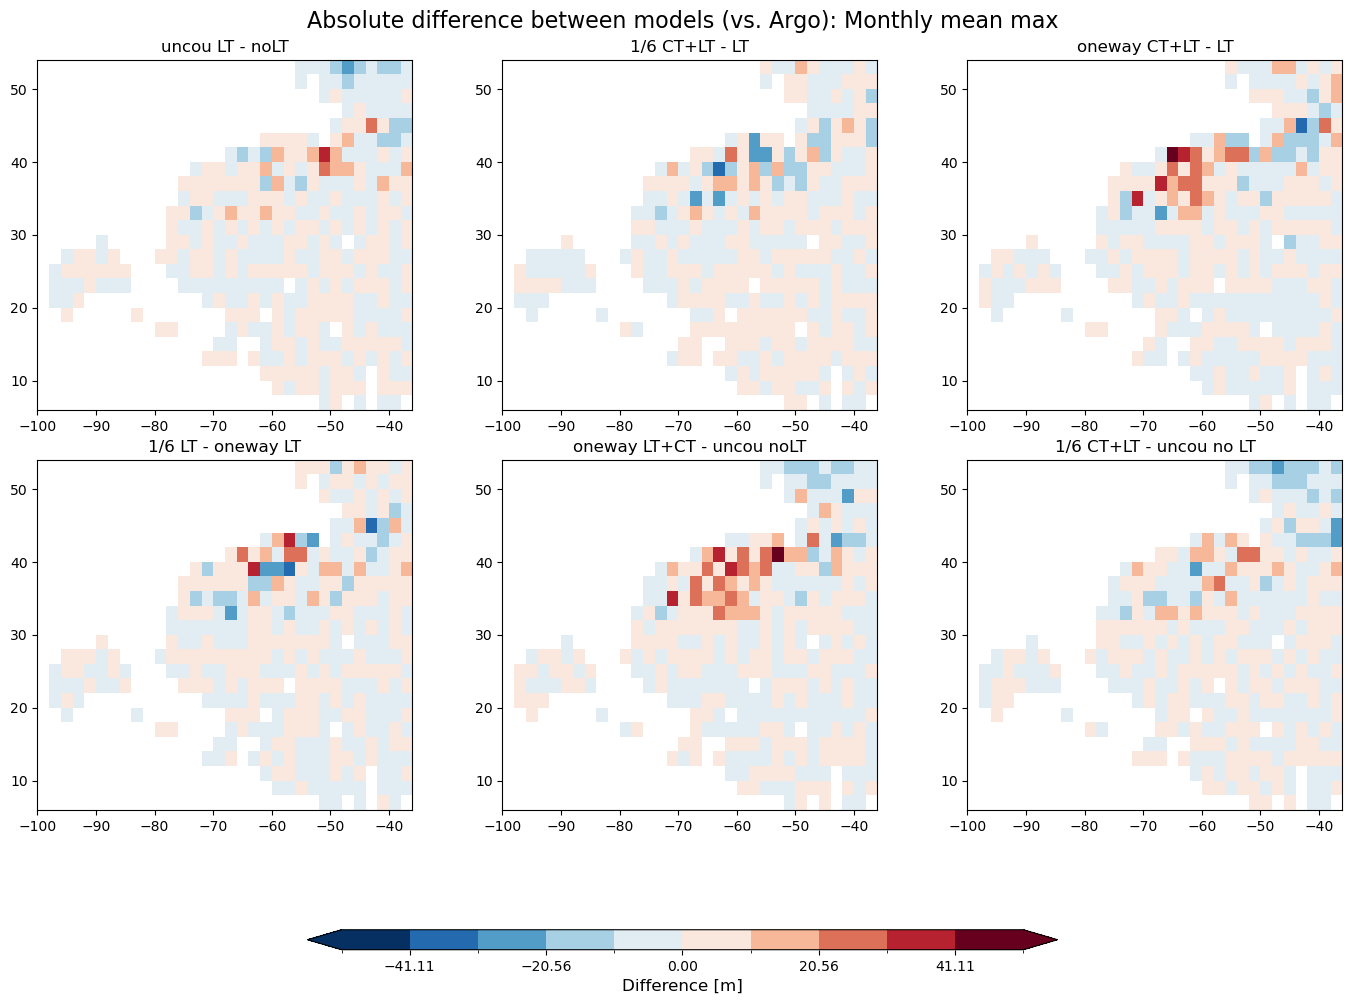

min                   Bias       RMS        R²
uncou_noLT    0.253352  3.162541  0.665294
uncou_LT      0.392073  3.189849  0.659011
oneway_LT     0.180258  3.195503  0.663319
oneway_LT+CT  0.162102  3.140659  0.660681
1/6_LT        0.363096  3.161614  0.667443
1/6_CT+LT     0.385270  3.184998  0.663036
max                   Bias        RMS        R²
uncou_noLT   -1.419483  17.430564  0.633350
uncou_LT     -0.200502  17.009922  0.667314
oneway_LT    -0.162946  17.917910  0.637615
oneway_LT+CT  1.029335  19.185703  0.621751
1/6_LT        0.348350  17.014190  0.671675
1/6_CT+LT    -0.099025  17.015404  0.668631


In [6]:
cmap = copy.copy(plt.cm.viridis_r)
cmap2 = copy.copy(plt.cm.PuOr)
cmap.set_bad('gray')
cmap2.set_bad('gray')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

for method in ['min', 'max']:  # Iterate through methods
    
    # Calculate differences
    uncou_LT_noLT = np.abs(dif_uncou[method].values) - np.abs(dif_uncou_LAfalse[method].values)
    all_wave_6 = np.abs(dif_6_all[method].values) - np.abs(dif_6_wave[method].values)  
    all_wave_oneway = np.abs(dif_oneway_all[method].values) - np.abs(dif_oneway[method].values) 
    # all_wave_12 = np.abs(dif_12_all[method].values) - np.abs(dif_12_wave[method].values)  
    wave_6_uncou = np.abs(dif_6_wave[method].values) - np.abs(dif_uncou[method].values)  
    oneway_uncou = np.abs(dif_oneway[method].values) - np.abs(dif_uncou[method].values)  
    wave_6_oneway = np.abs(dif_6_wave[method].values) - np.abs(dif_oneway[method].values)  
   
    all_oneway_uncounoLT = np.abs(dif_oneway_all[method].values) - np.abs(dif_uncou_LAfalse[method].values) 
    all_6_uncounoLT = np.abs(dif_6_all[method].values) - np.abs(dif_uncou_LAfalse[method].values) 
    # wave_12_uncou = np.abs(dif_12_wave[method].values) - np.abs(dif_uncou[method].values)  
    # wave_12_6 = np.abs(dif_12_wave[method].values) - np.abs(dif_6_wave[method].values)  

    datasets = [uncou_LT_noLT, all_wave_6, all_wave_oneway,  wave_6_oneway,all_oneway_uncounoLT,all_6_uncounoLT ]  
    titles = [
        'uncou LT - noLT',
        '1/6 CT+LT - LT',
        'oneway CT+LT - LT',
        # '1/6 LT - uncou LT',
        # 'oneway LT - uncou LT',
        '1/6 LT - oneway LT',
        'oneway LT+CT - uncou noLT',
        '1/6 CT+LT - uncou no LT'
    ]
    
    # Get symmetric range for colorbar (zero-centered)
    max_abs = max(np.nanmax(np.abs(data)) for data in datasets)  # Largest absolute value
    levels = np.linspace(-max_abs, max_abs, 11)  # 11 levels (zero is midpoint)
    
    # Use RdBu_r (red-white-blue) diverging colormap
    cmap = plt.cm.RdBu_r
    norm = mcolors.BoundaryNorm(levels, cmap.N)

    # Get lon/lat
    lon = dif_uncou[method]['lon'].values
    lat = dif_uncou[method]['lat'].values
    lon, lat = np.meshgrid(lon, lat)
    
    # Create figure
    F = plt.figure(figsize=(15, 10))
    
    # Plot all datasets in a 2x3 grid
    for i, (data, title) in enumerate(zip(datasets, titles)):
        row = i // 3  # 0 or 1 (2 rows)
        col = i % 3   # 0, 1, or 2 (3 columns)
        
        # Position subplots (adjust margins as needed)
        left = 0.07 + col * 0.31
        bottom = 0.55 - row * 0.4
        ax = F.add_axes([left, bottom, 0.25, 0.35])
        
        # Plot with diverging colormap
        im = ax.pcolormesh(lon, lat, data,
                          shading="auto",
                          cmap=cmap,
                          norm=norm)
        ax.set_title(title, fontsize=12)
    
    
    # Add a single shared colorbar at the bottom
    cax = F.add_axes([0.25, 0.01, 0.5, 0.02])  # [left, bottom, width, height]
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal', extend='both')
    cbar.set_label('Difference [m]', fontsize=12)
    
    # Add main title
    F.suptitle(
        f'Absolute difference between models (vs. Argo): Monthly mean {method}',
        fontsize=16,
        y=0.95
    )
    
    plt.tight_layout()
    plt.show()

# stats_min=[[dif_uncou_LAfalse['min_bias'].values,dif_uncou_LAfalse['min_RMS'].values,dif_uncou_LAfalse['min_r2'].values],
#            [dif_uncou['min_bias'].values,dif_uncou['min_RMS'].values,dif_uncou['min_r2'].values],
#         [dif_6_wave['min_bias'].values,dif_6_wave['min_RMS'].values,dif_6_wave['min_r2'].values],
#            [dif_6_all['min_bias'].values,dif_6_all['min_RMS'].values,dif_6_all['min_r2'].values],
#             [dif_12_wave['min_bias'].values,dif_12_wave['min_RMS'].values,dif_12_wave['min_r2'].values],
#            [dif_12_all['min_bias'].values,dif_12_all['min_RMS'].values,dif_12_all['min_r2'].values]
    
# ]
stats_min=[[dif_uncou_LAfalse['min_bias'].values,dif_uncou_LAfalse['min_RMS'].values,dif_uncou_LAfalse['min_r2'].values],
           [dif_uncou['min_bias'].values,dif_uncou['min_RMS'].values,dif_uncou['min_r2'].values],
            [dif_oneway['min_bias'].values,dif_oneway['min_RMS'].values,dif_oneway['min_r2'].values],
           [dif_oneway_all['min_bias'].values,dif_oneway_all['min_RMS'].values,dif_oneway_all['min_r2'].values],
        [dif_6_wave['min_bias'].values,dif_6_wave['min_RMS'].values,dif_6_wave['min_r2'].values],
           [dif_6_all['min_bias'].values,dif_6_all['min_RMS'].values,dif_6_all['min_r2'].values],

    
]
stats_max=[[dif_uncou_LAfalse['max_bias'].values,dif_uncou_LAfalse['max_RMS'].values,dif_uncou_LAfalse['max_r2'].values],
           [dif_uncou['max_bias'].values,dif_uncou['max_RMS'].values,dif_uncou['max_r2'].values],
        [dif_oneway['max_bias'].values,dif_oneway['max_RMS'].values,dif_oneway['max_r2'].values],
           [dif_oneway_all['max_bias'].values,dif_oneway_all['max_RMS'].values,dif_oneway_all['max_r2'].values],
        [dif_6_wave['max_bias'].values,dif_6_wave['max_RMS'].values,dif_6_wave['max_r2'].values],
           [dif_6_all['max_bias'].values,dif_6_all['max_RMS'].values,dif_6_all['max_r2'].values],

    
]
import pandas as pd

# Define column names and model labels
models = ["uncou_noLT", "uncou_LT","oneway_LT", "oneway_LT+CT", "1/6_LT", "1/6_CT+LT",]
metrics = ["Bias", "RMS", "R²"]

# Reshape data into a 6x3 table
data = np.array(stats_min).reshape(6, 3)
data_max = np.array(stats_max).reshape(6, 3)
# Create DataFrame
df = pd.DataFrame(data, index=models, columns=metrics)
df_max = pd.DataFrame(data_max, index=models, columns=metrics)
print('min',df)
print('max',df_max)

    

/vftmp/Qian.Xiao/pid2005190/ipykernel_2007402/2660342140.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


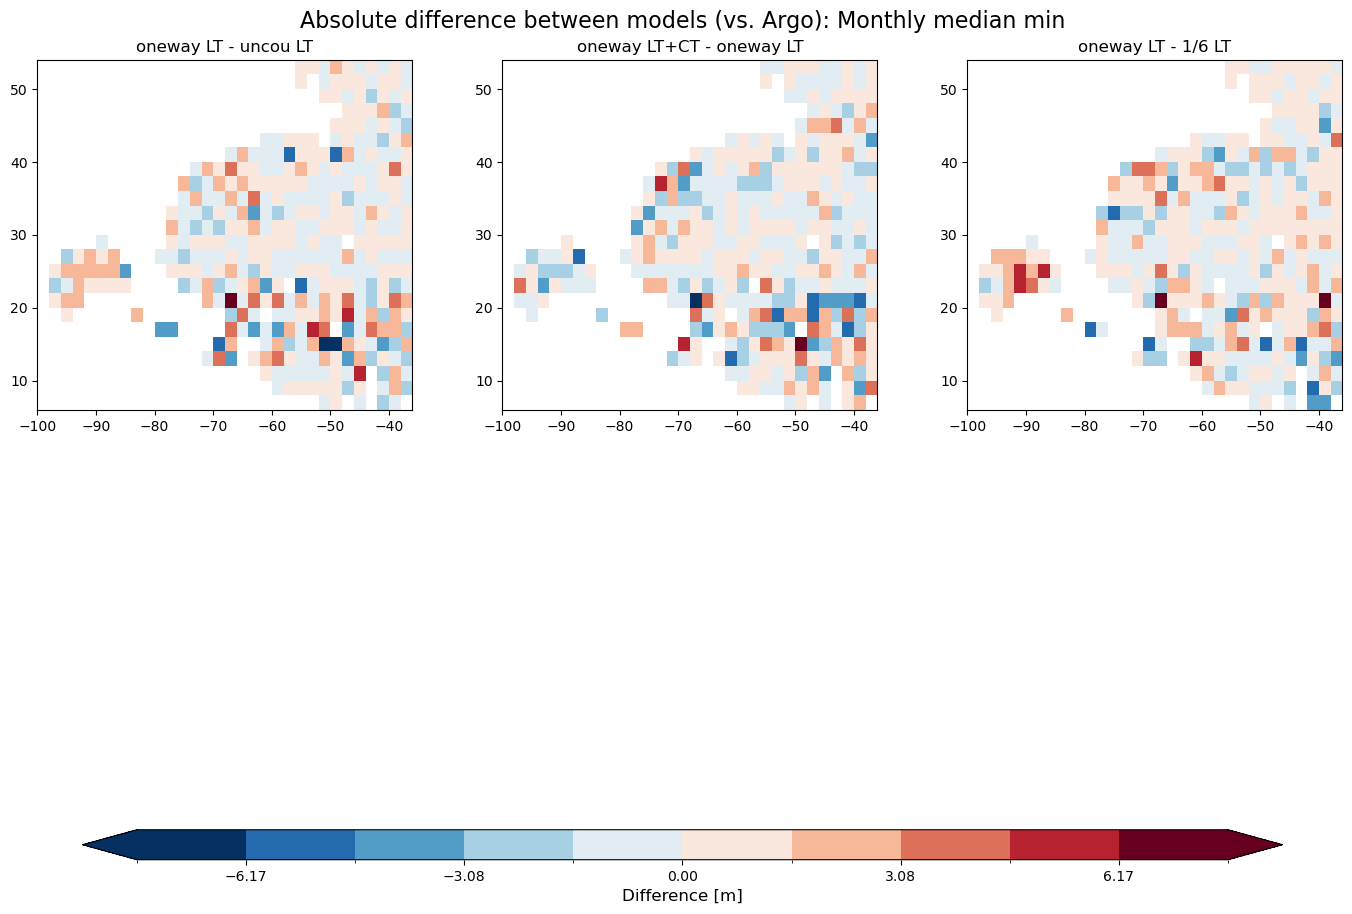

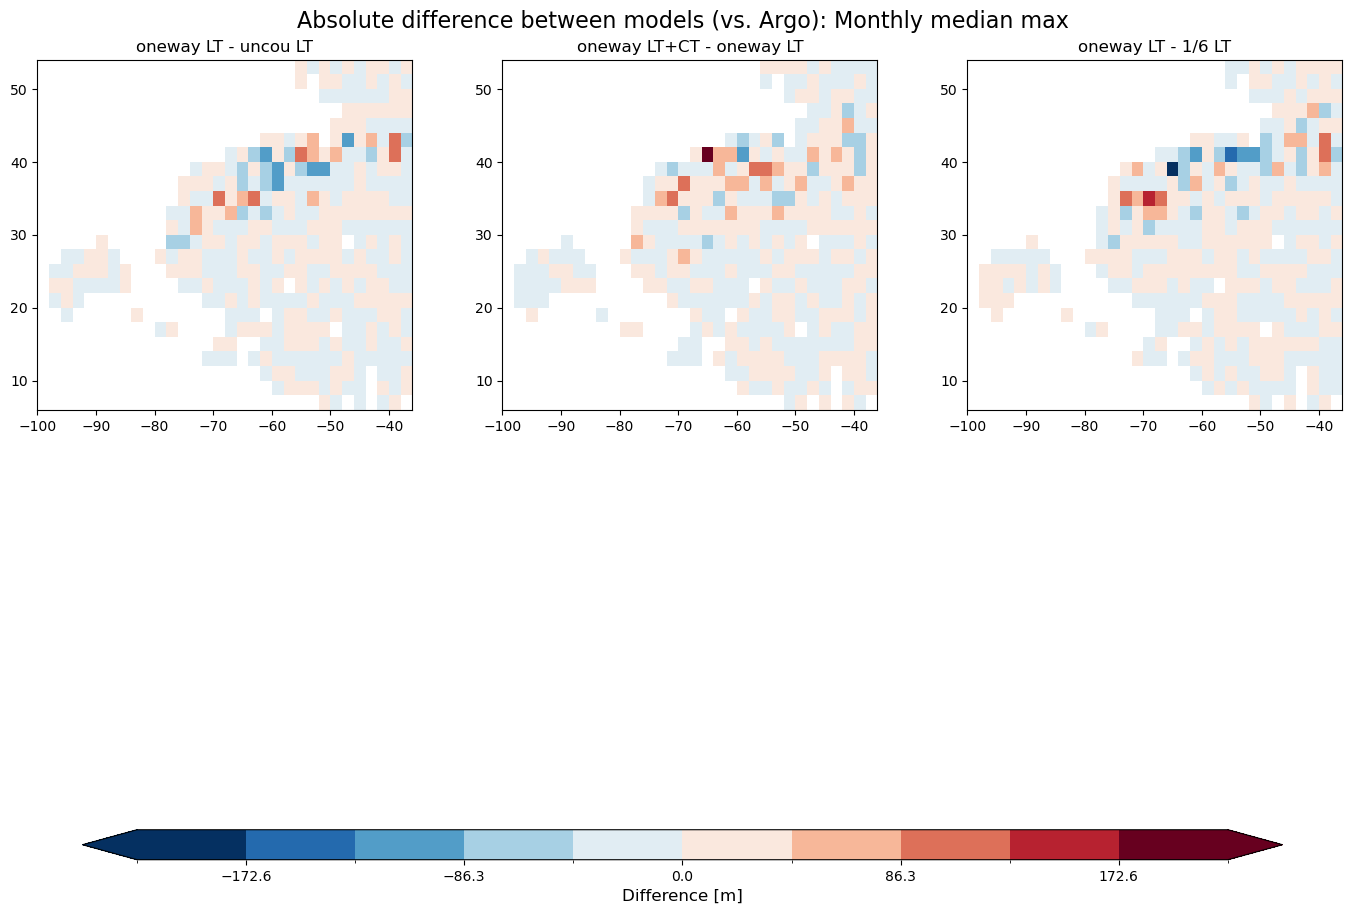

In [8]:
cmap = copy.copy(plt.cm.viridis_r)
cmap2 = copy.copy(plt.cm.PuOr)
cmap.set_bad('gray')
cmap2.set_bad('gray')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

for method in ['min', 'max']:  # Iterate through methods
    
    # Calculate differences
    uncou_LT_onewayLT =  np.abs(dif_oneway[method].values) - np.abs(dif_uncou[method].values)
    oneway_wave_all = np.abs(dif_oneway_all[method].values) - np.abs(dif_oneway[method].values)  
    oneway_wave_6 = np.abs(dif_oneway[method].values) - np.abs(dif_6_wave[method].values)  
   

    datasets = [uncou_LT_onewayLT, oneway_wave_all, oneway_wave_6]  
    titles = [
        'oneway LT - uncou LT',
        'oneway LT+CT - oneway LT',
        'oneway LT - 1/6 LT',

    ]
    
    # Get symmetric range for colorbar (zero-centered)
    max_abs = max(np.nanmax(np.abs(data)) for data in datasets)  # Largest absolute value
    levels = np.linspace(-max_abs, max_abs, 11)  # 11 levels (zero is midpoint)
    
    # Use RdBu_r (red-white-blue) diverging colormap
    cmap = plt.cm.RdBu_r
    norm = mcolors.BoundaryNorm(levels, cmap.N)

    # Get lon/lat
    lon = dif_uncou[method]['lon'].values
    lat = dif_uncou[method]['lat'].values
    lon, lat = np.meshgrid(lon, lat)
    
    # Create figure
    F = plt.figure(figsize=(15, 10))
    
    # Plot all datasets in a 2x3 grid
    for i, (data, title) in enumerate(zip(datasets, titles)):
        row = i // 3  # 0 or 1 (2 rows)
        col = i % 3   # 0, 1, or 2 (3 columns)
        
        # Position subplots (adjust margins as needed)
        left = 0.07 + col * 0.31
        bottom = 0.55 - row * 0.4
        ax = F.add_axes([left, bottom, 0.25, 0.35])
        
        # Plot with diverging colormap
        im = ax.pcolormesh(lon, lat, data,
                          shading="auto",
                          cmap=cmap,
                          norm=norm)
        ax.set_title(title, fontsize=12)
    
    
    # Add a single shared colorbar at the bottom
    # cax = F.add_axes([0.25, 0.05, 0.5, 0.02])  # [left, bottom, width, height]
    cax = F.add_axes([0.1, 0.1, 0.8, 0.03]) 
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal', extend='both')
    cbar.set_label('Difference [m]', fontsize=12)
    
    # Add main title
    F.suptitle(
        f'Absolute difference between models (vs. Argo): Monthly median {method}',
        fontsize=16,
        y=0.95
    )
    
    plt.tight_layout()
    plt.show()



    